<a href="https://colab.research.google.com/github/channdankumar/HOUSE_PRICE_PREDICTION/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/data.csv')

HOUSE PRICE PREDICTION

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
df.shape

(4600, 18)

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
null_counts = df.isnull().sum()

In [ ]:
features_with_null = null_counts[null_counts> 0].index
print(features_with_null)

Index([], dtype='object')


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [ ]:
object_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(include=['int','float']).columns.tolist()
print("object columns:", object_columns)
print('\n')
print("Numerical columns:", numerical_columns)

object columns: ['date', 'street', 'city', 'statezip', 'country']


Numerical columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


In [ ]:
for i in object_columns:
  print(i)
print(df[i].unique())
print('\n')

date
street
city
statezip
country
['USA']




In [ ]:
for i in object_columns:
  print(i)
print(df[i].value_counts())
print('\n')

date
street
city
statezip
country
USA    4600
Name: country, dtype: int64




In [ ]:
for i in object_columns:
  print('countplot for:',i)
  plt.figure(figsize=(15,6))
  sns.countplot(df[i], data = df, palette= 'hls')
  plt.xticks(rotation =-45)
  plt.show()
  print('\n')

countplot for: date


TypeError: ignored

<Figure size 1500x600 with 0 Axes>

countplot for: date


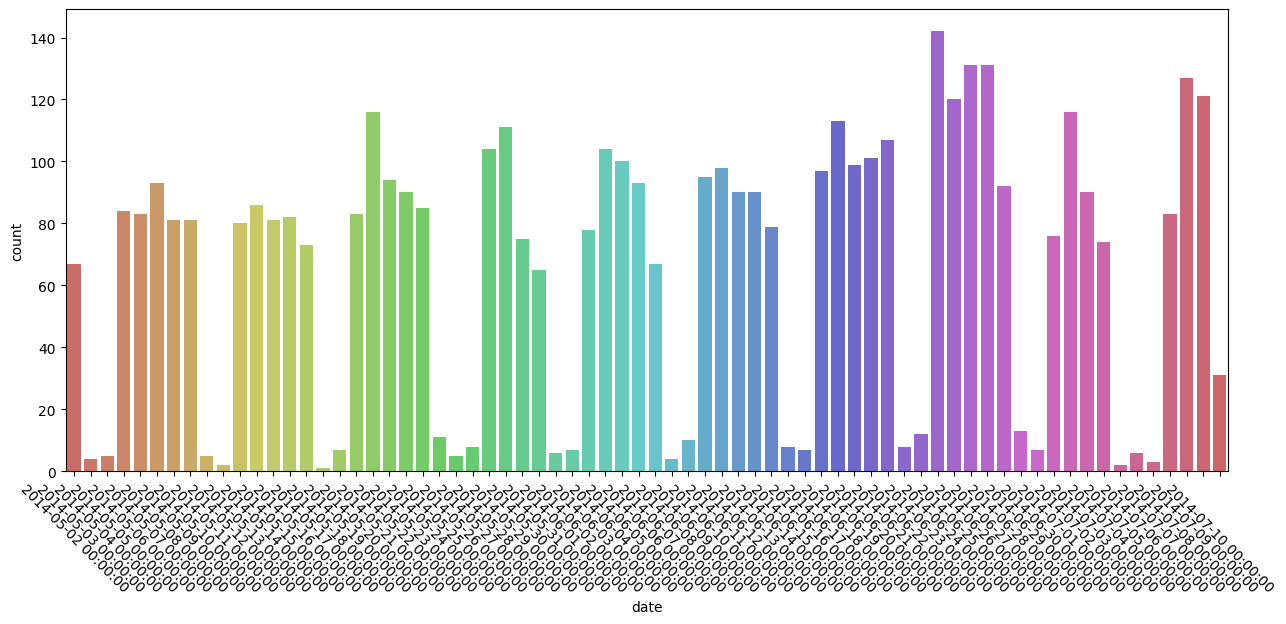



countplot for: street


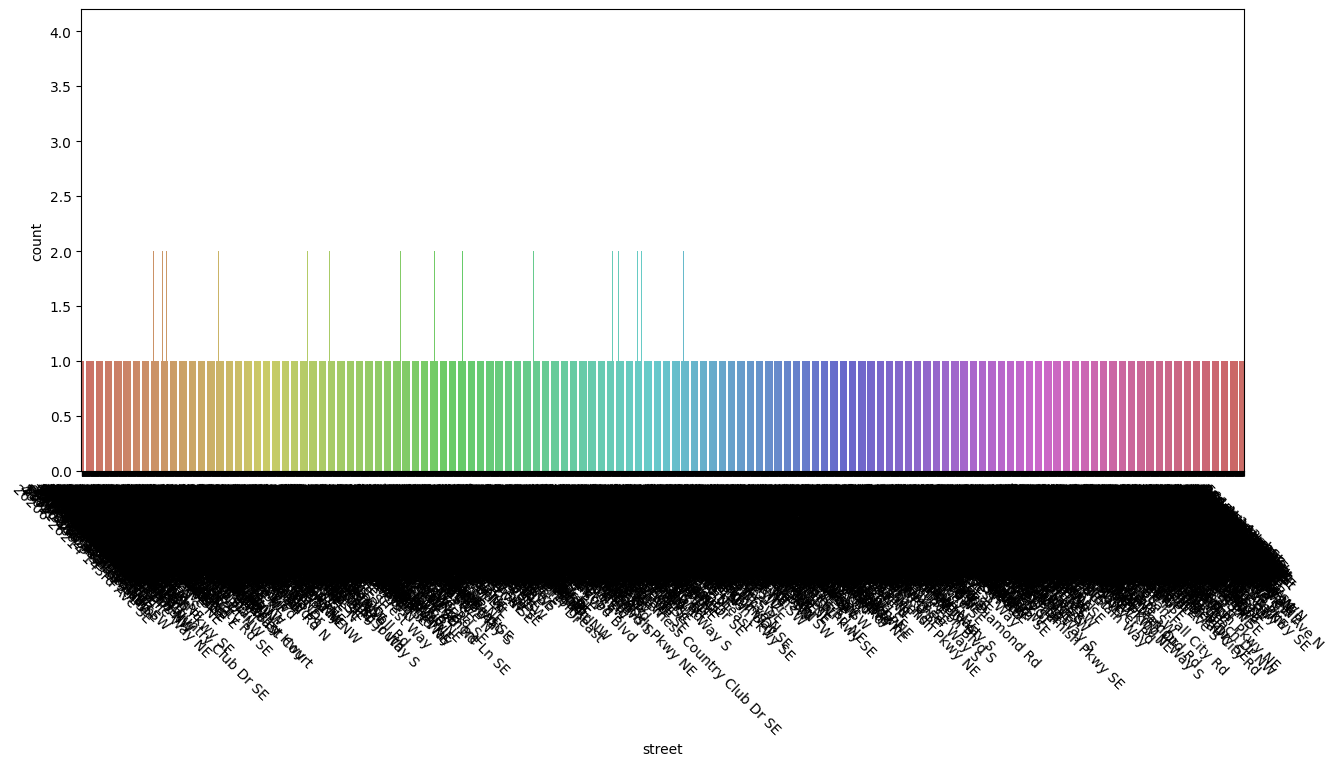



countplot for: city


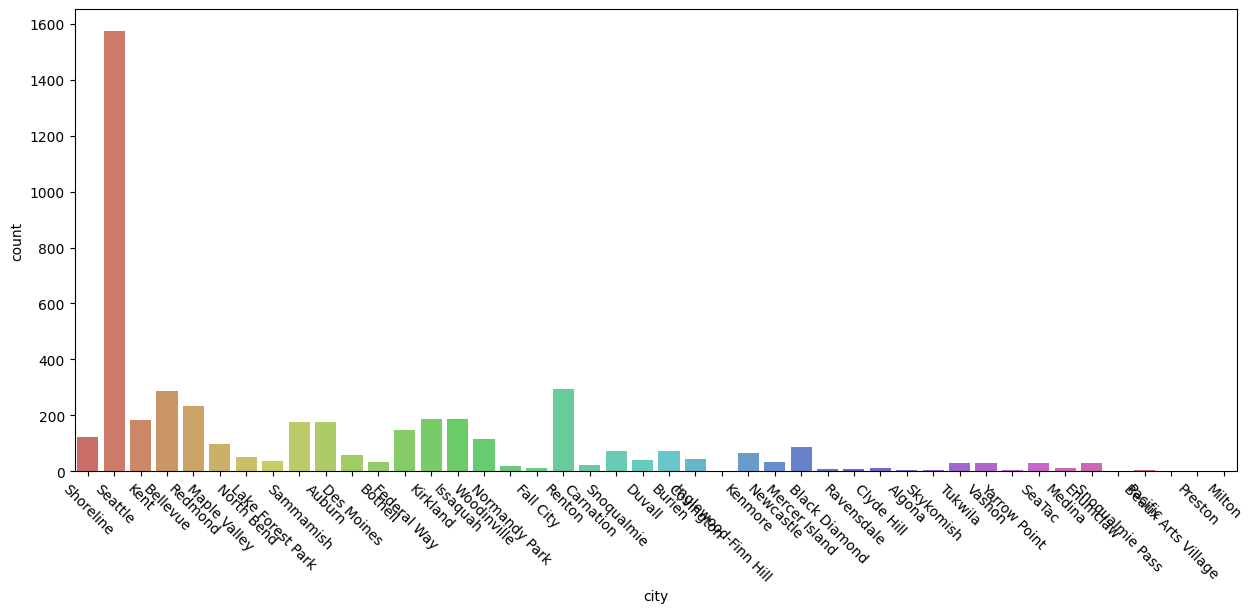



countplot for: statezip


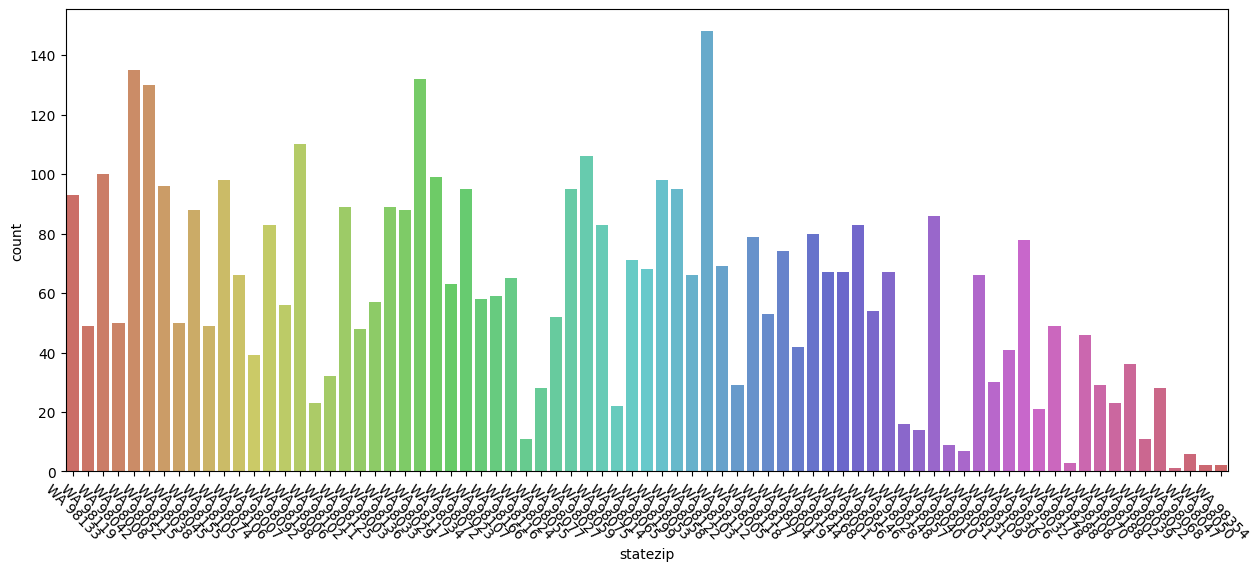



countplot for: country


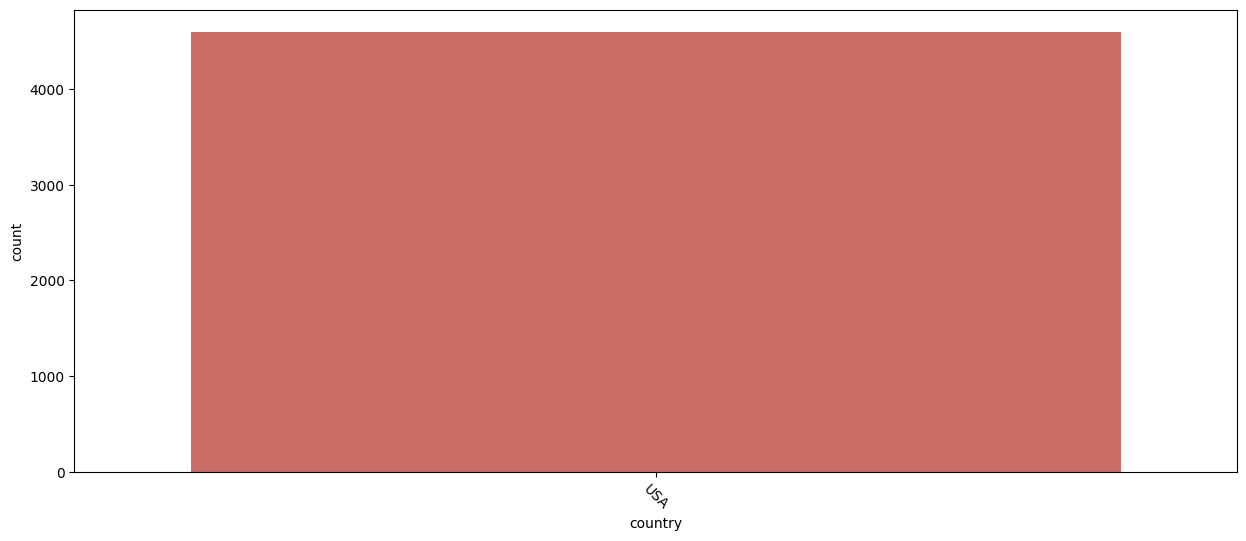

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in object_columns:
    print('countplot for:', i)
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=-45)
    plt.show()
    print('\n')


pie plot for: date


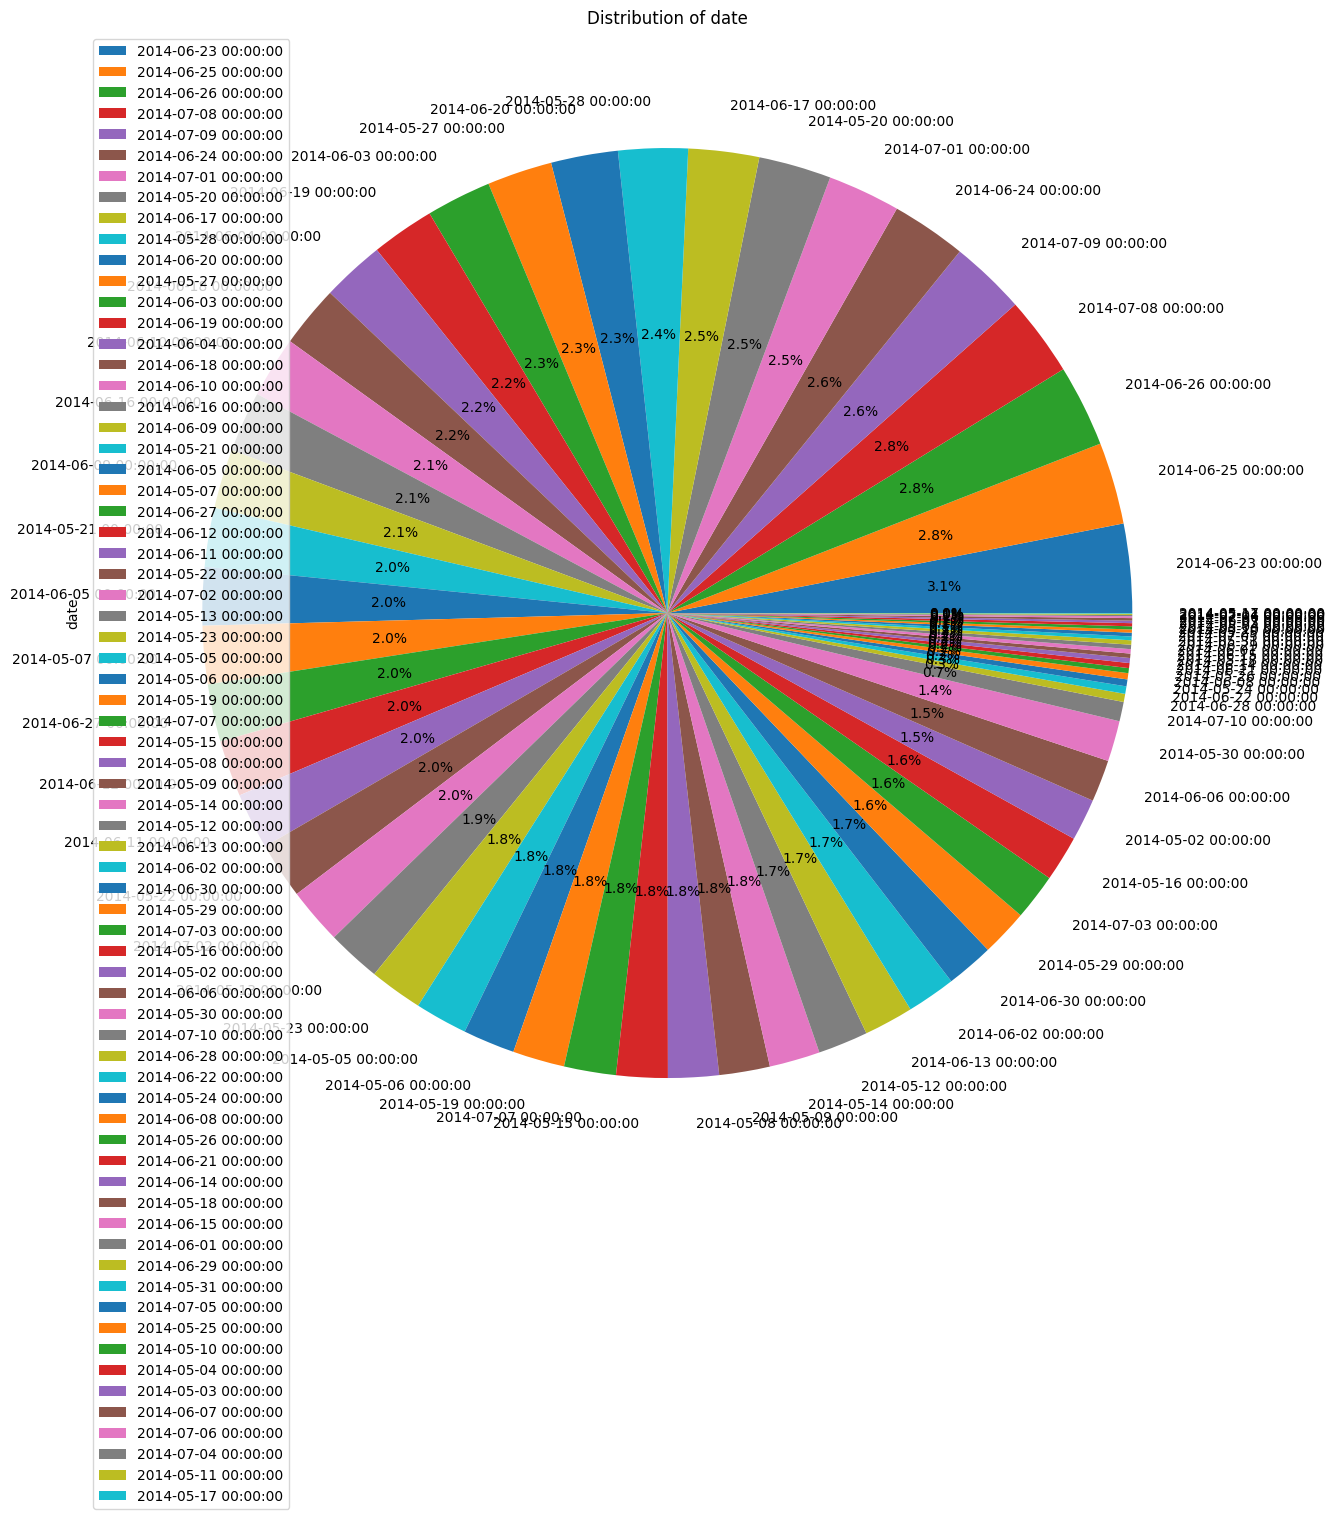



pie plot for: street


ValueError: ignored

<Figure size 1500x2000 with 1 Axes>



pie plot for: city


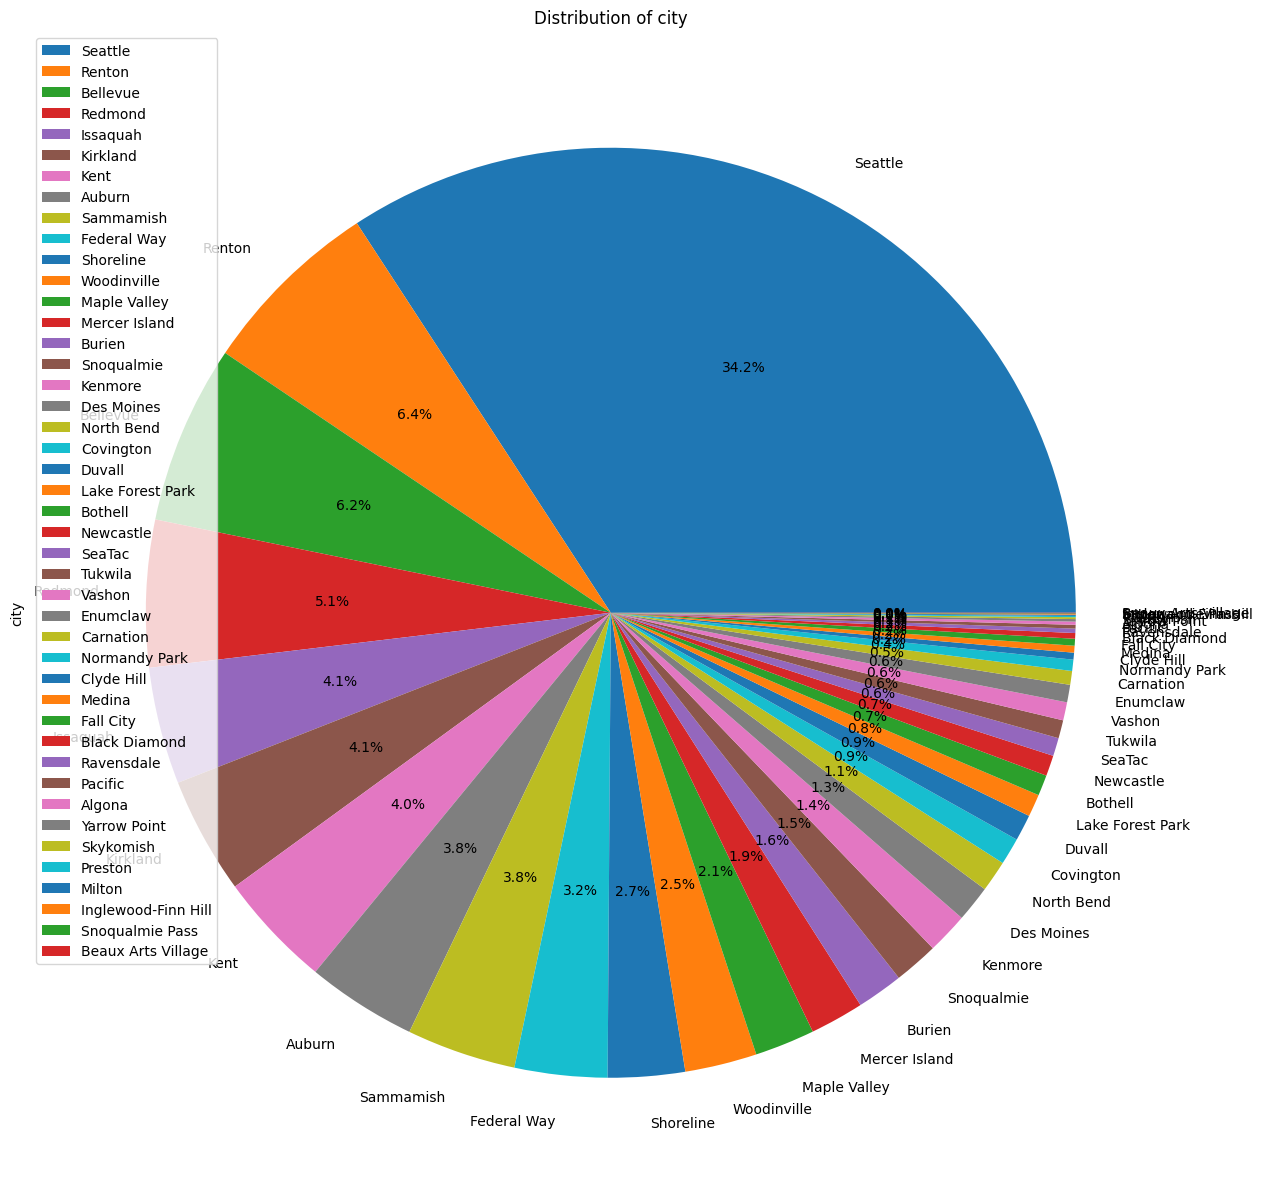



pie plot for: statezip


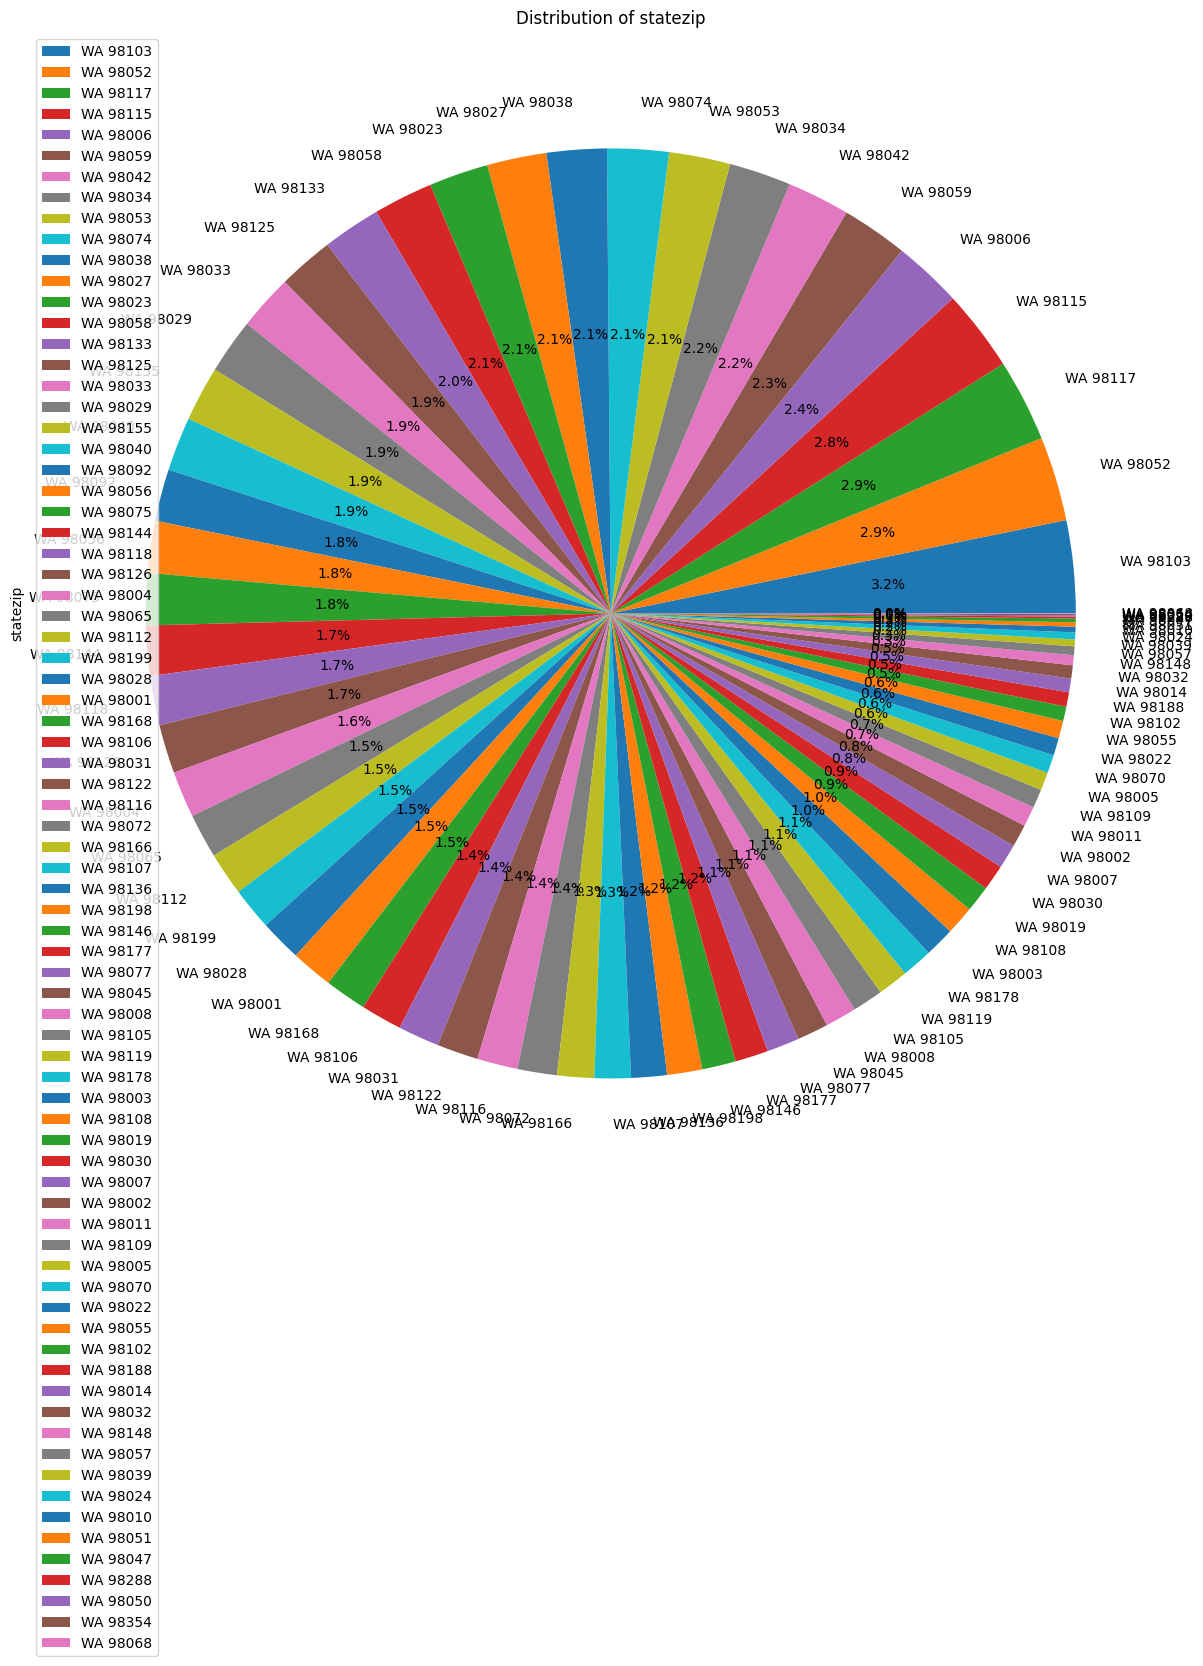



pie plot for: country


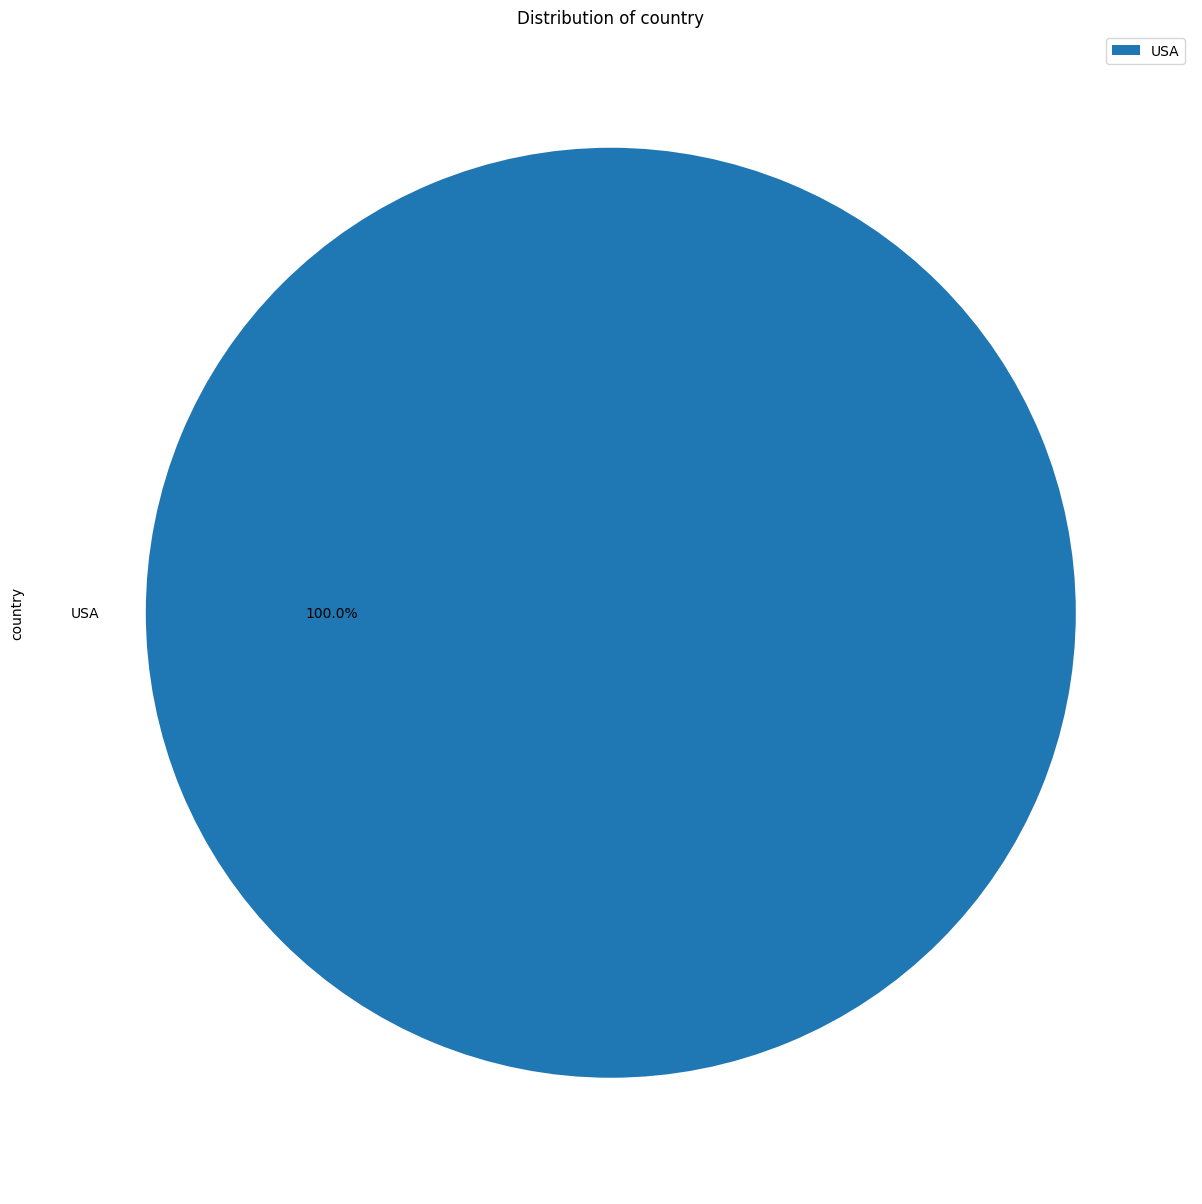

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in object_columns:
    print('pie plot for:', i)
    plt.figure(figsize=(15, 20))
    df[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of ' + i)
    plt.legend()
    plt.show()
    print('\n')


In [ ]:
import plotly.express as px

for i in object_columns:
    print('pie plot for:', i)
    fig = px.pie(df, names=i, title='Distribution of ' + i)
    fig.show()
    print('\n')


pie plot for: date




pie plot for: street




pie plot for: city




pie plot for: statezip




pie plot for: country


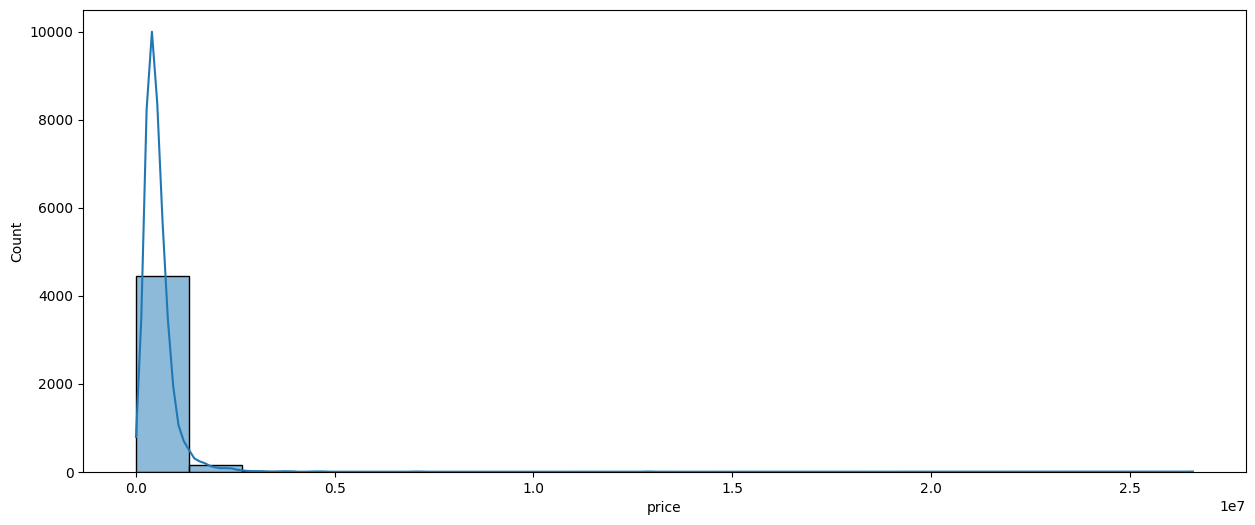

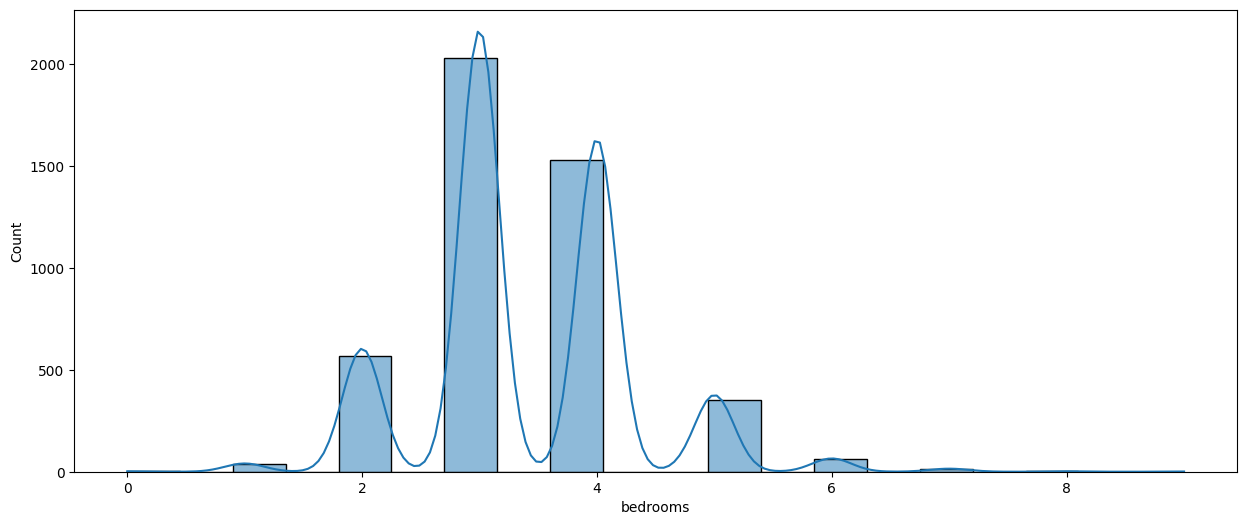

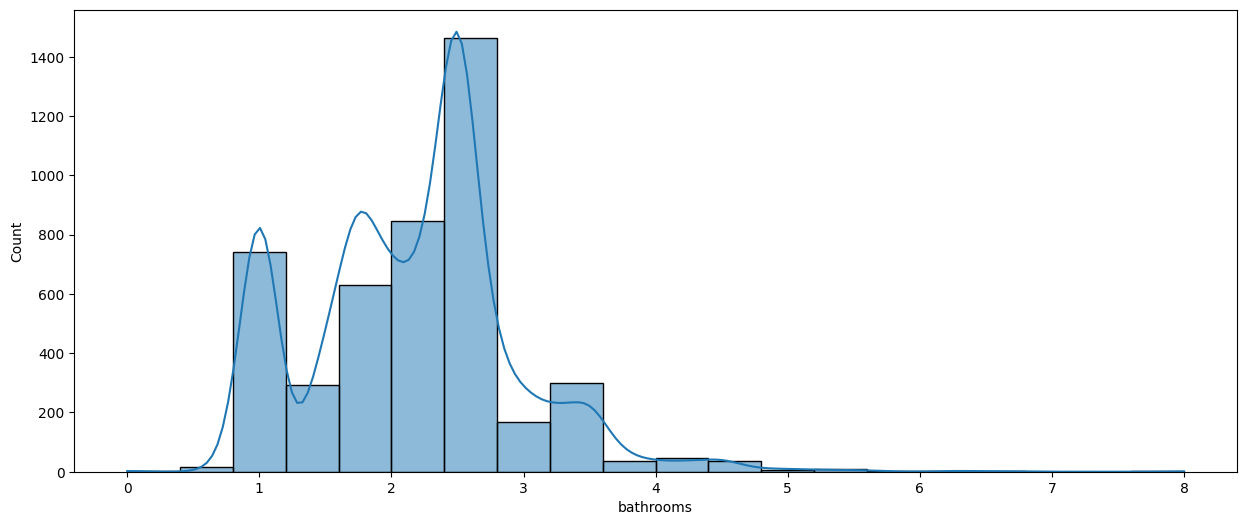

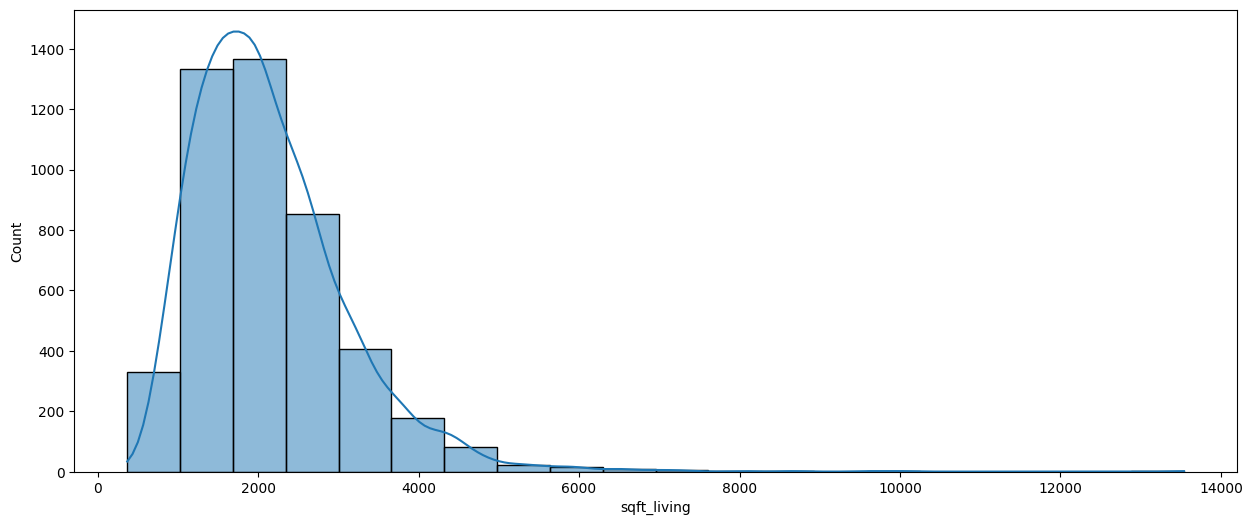

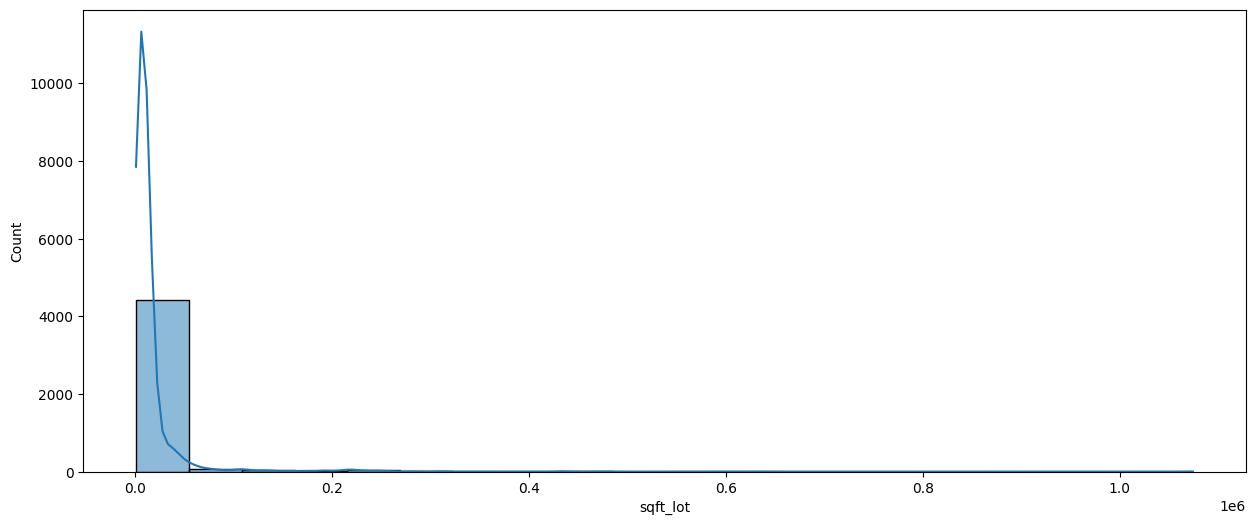

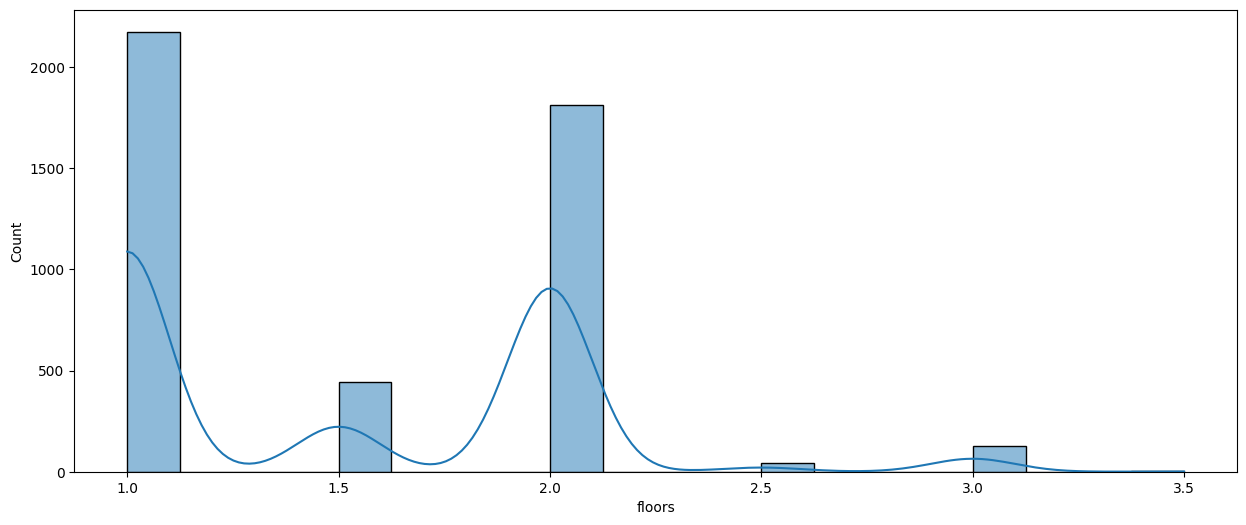

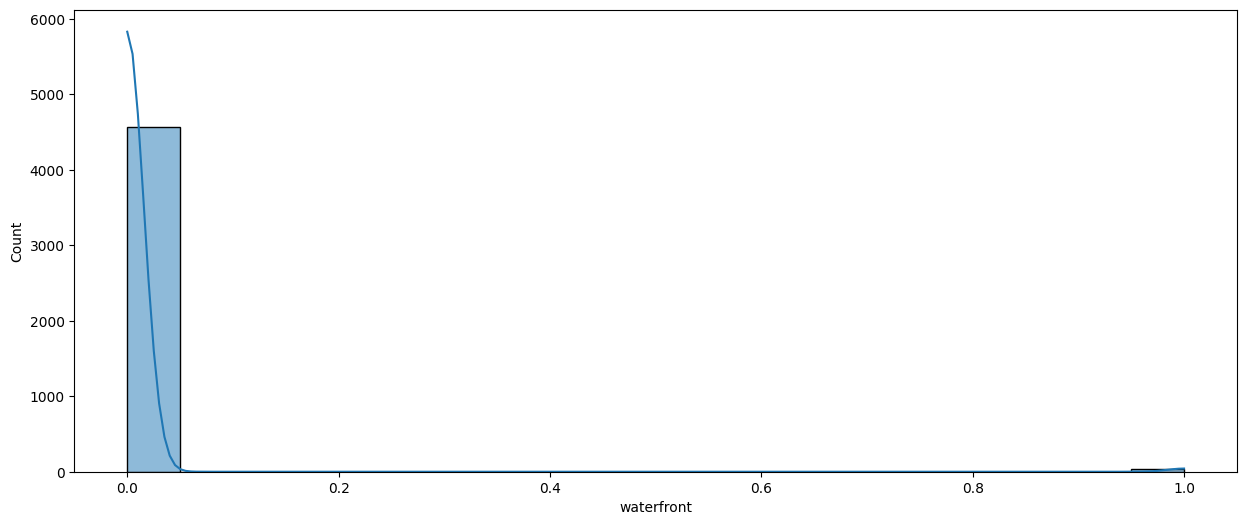

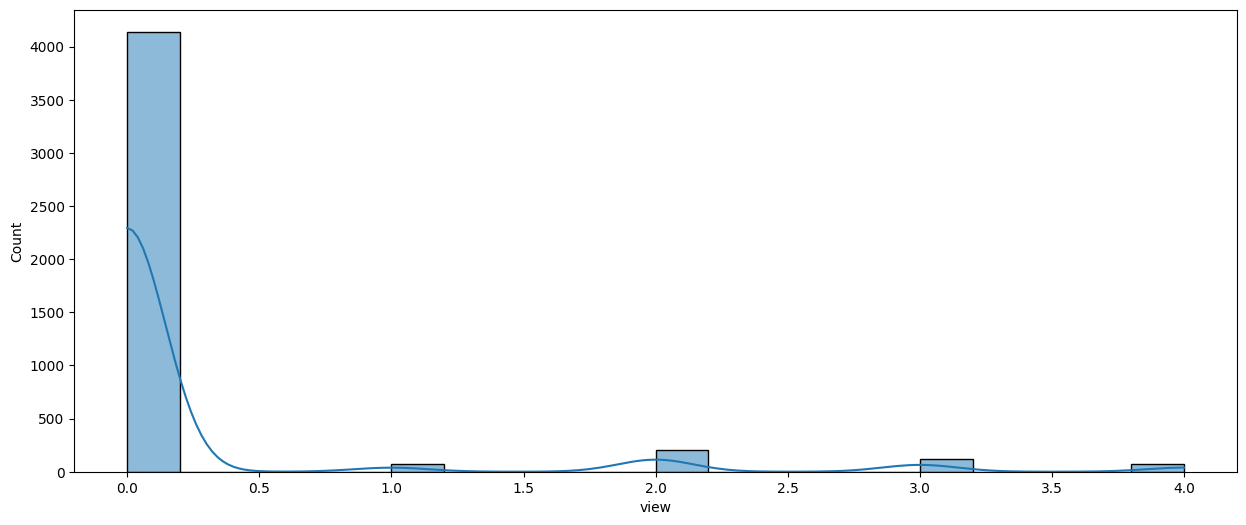

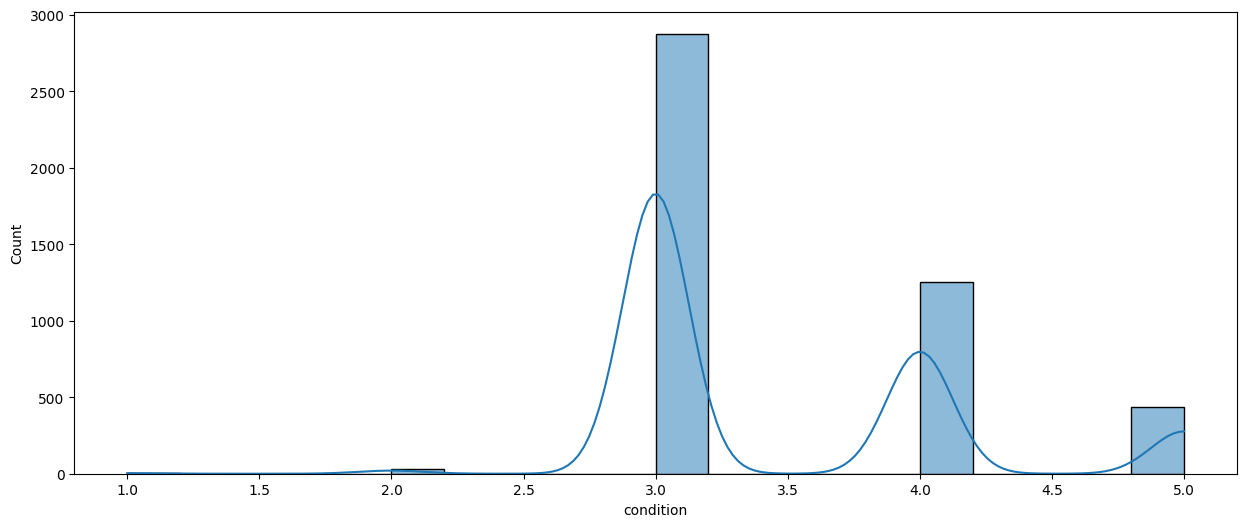

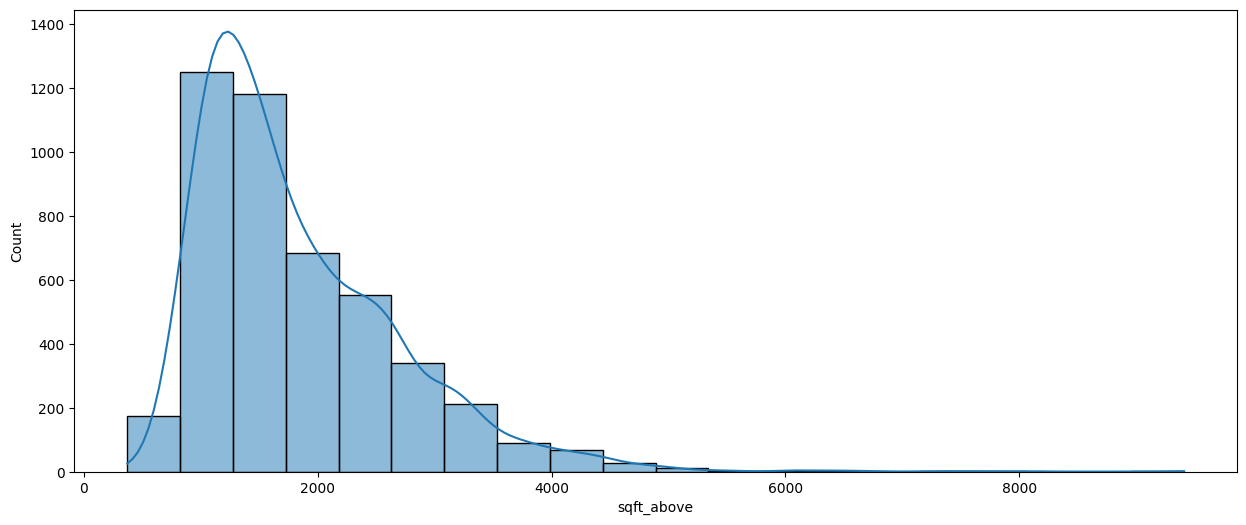

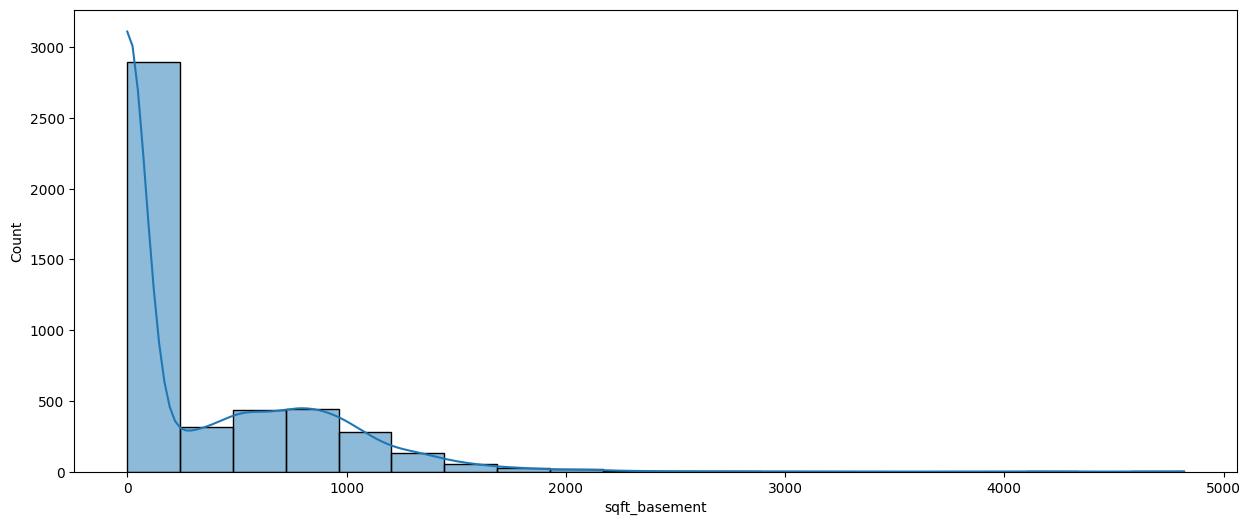

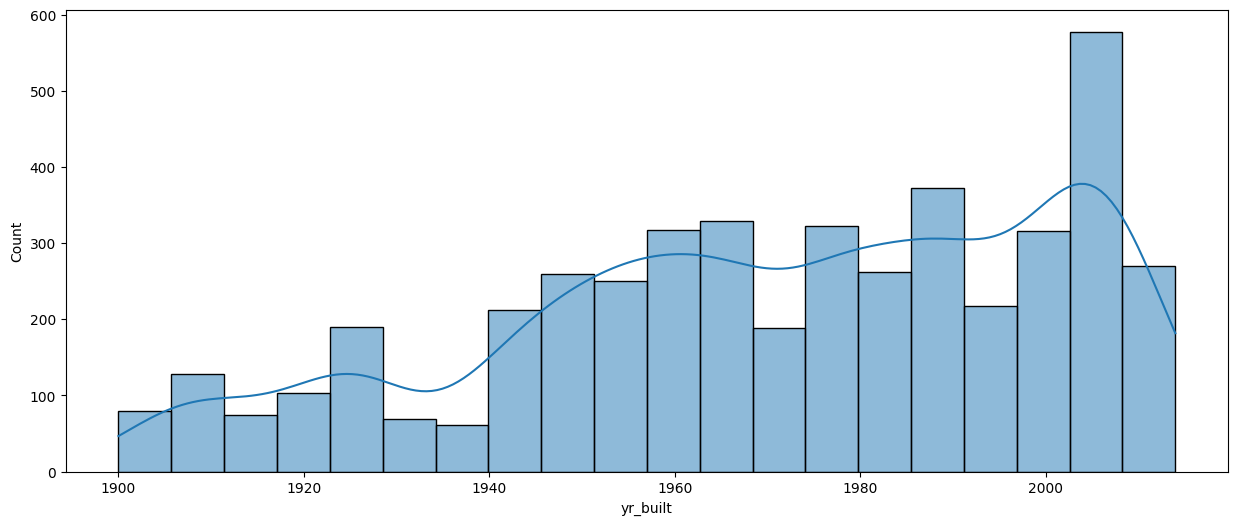

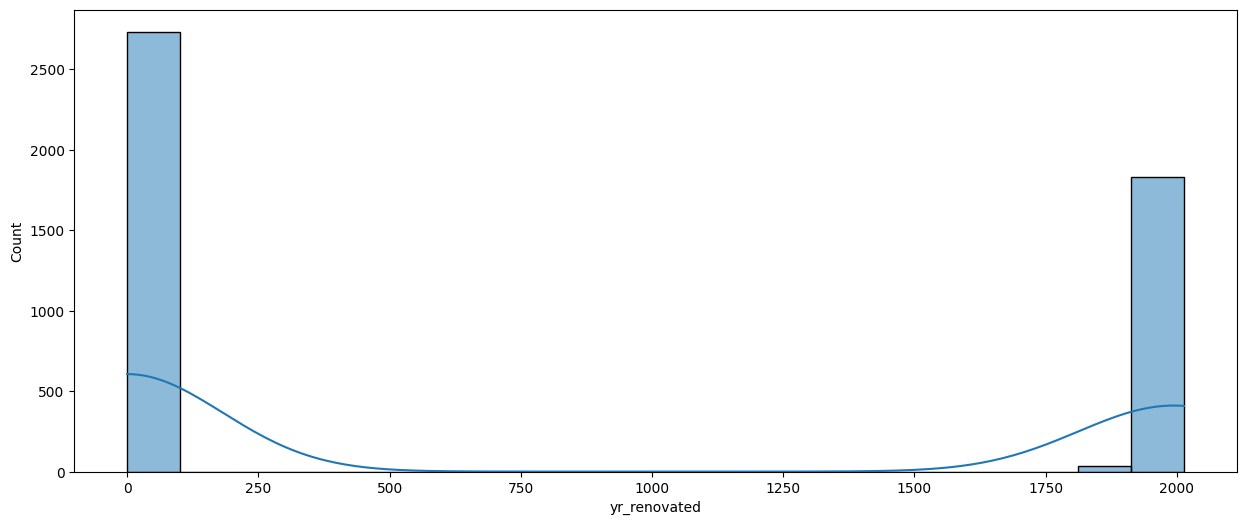

In [ ]:
for i in numerical_columns:
  plt.figure(figsize=(15,6))
  sns.histplot(df[i],kde = True, bins=20, palette='hls')
  plt.xticks(rotation=0)
  plt.show()

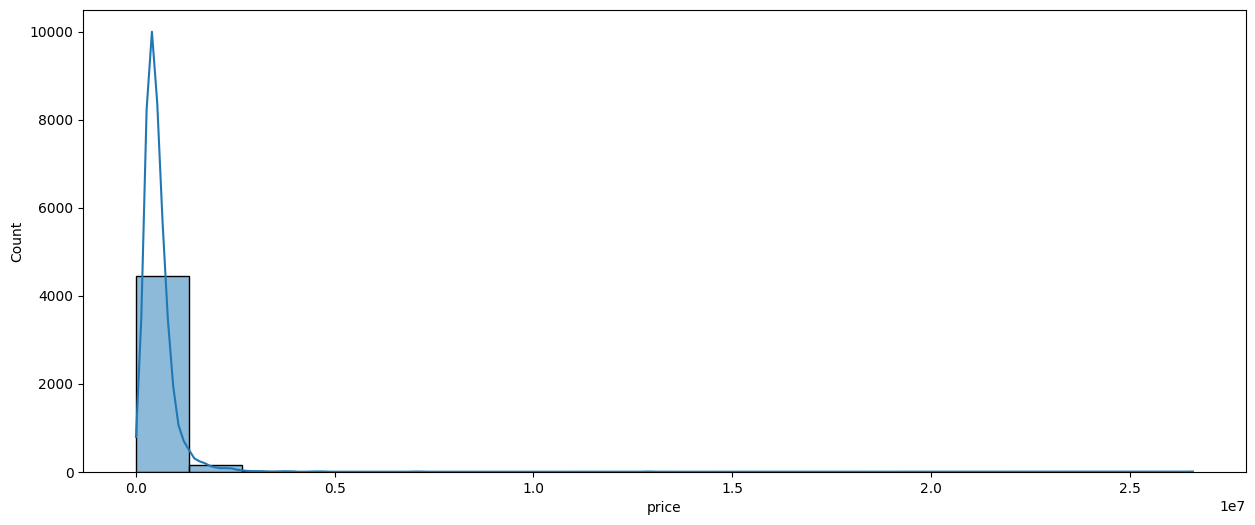

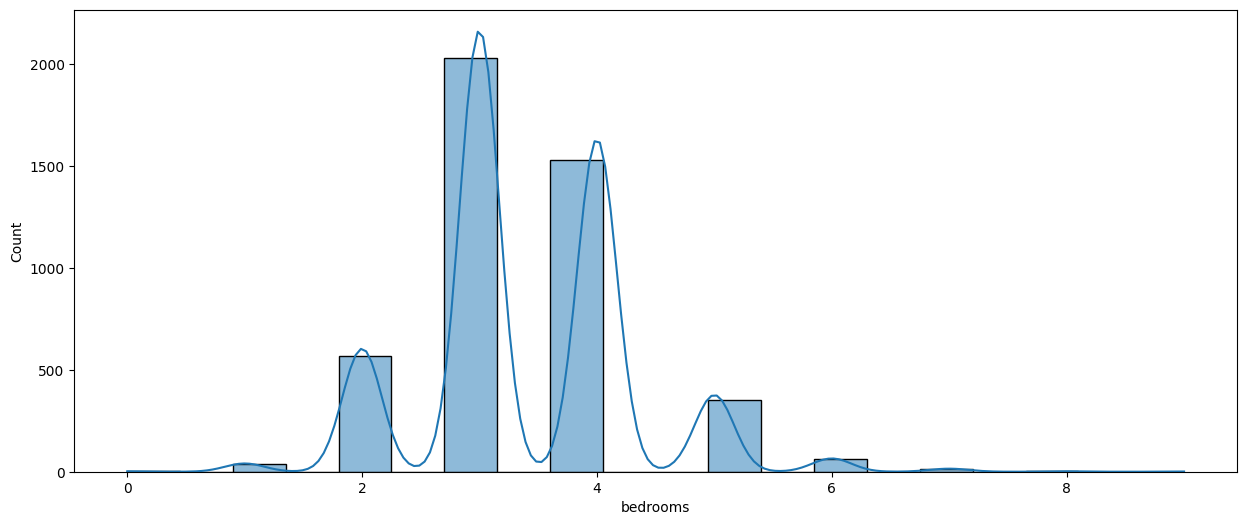

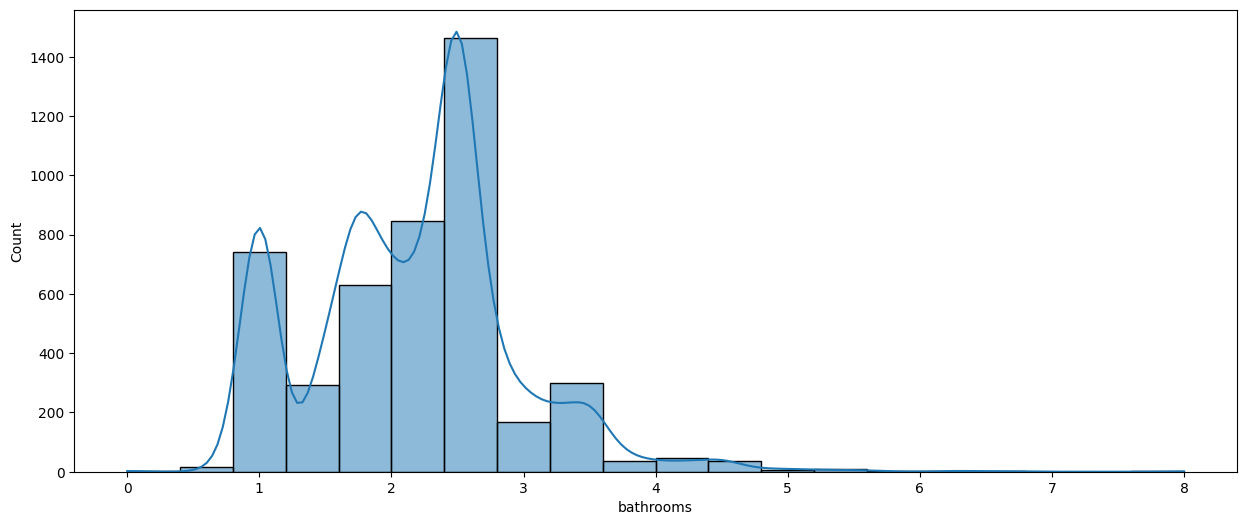

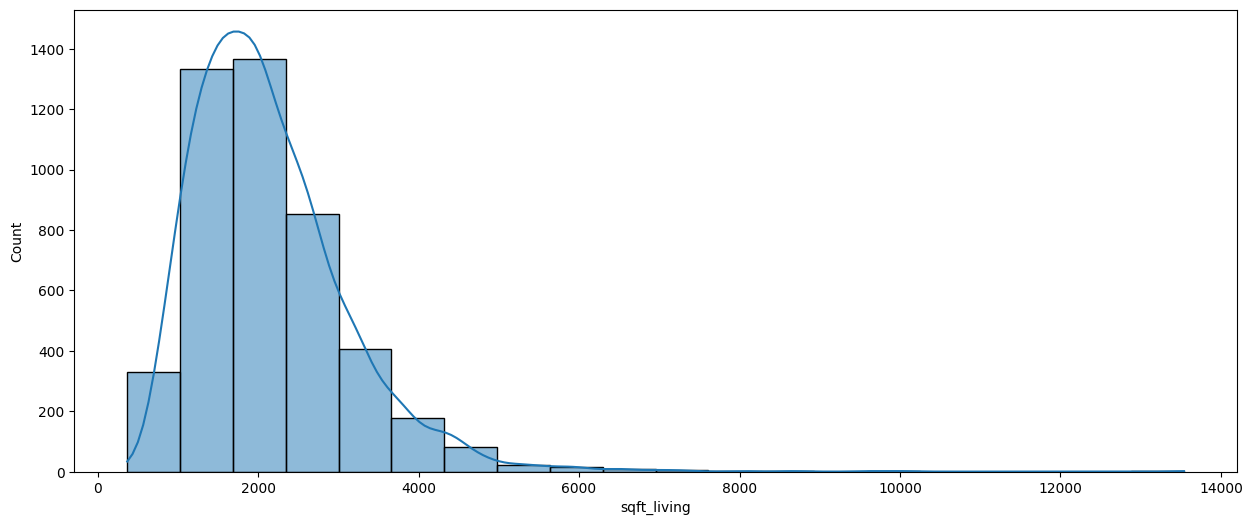

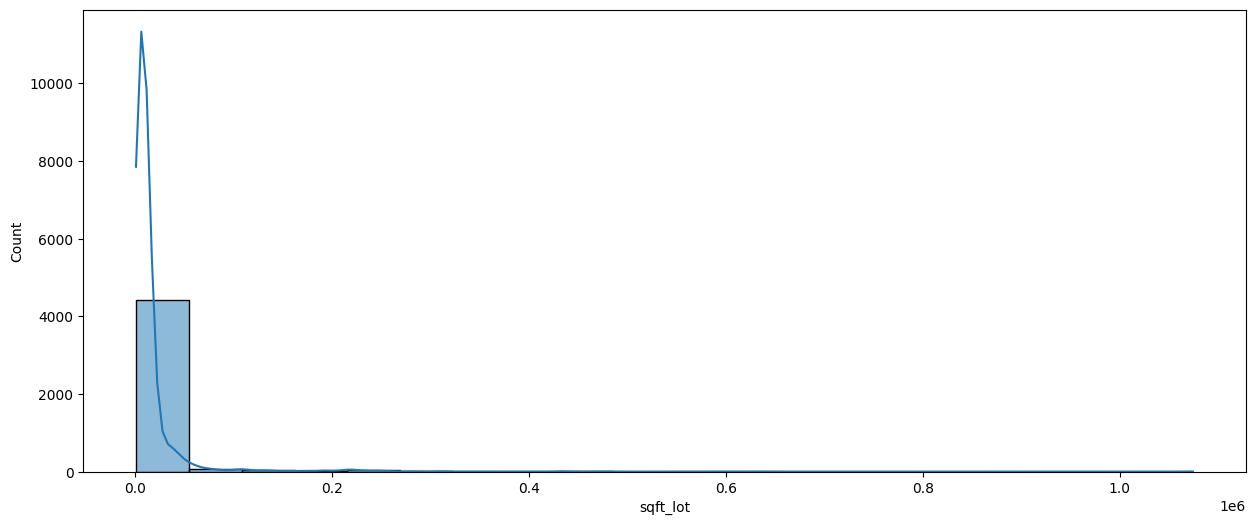

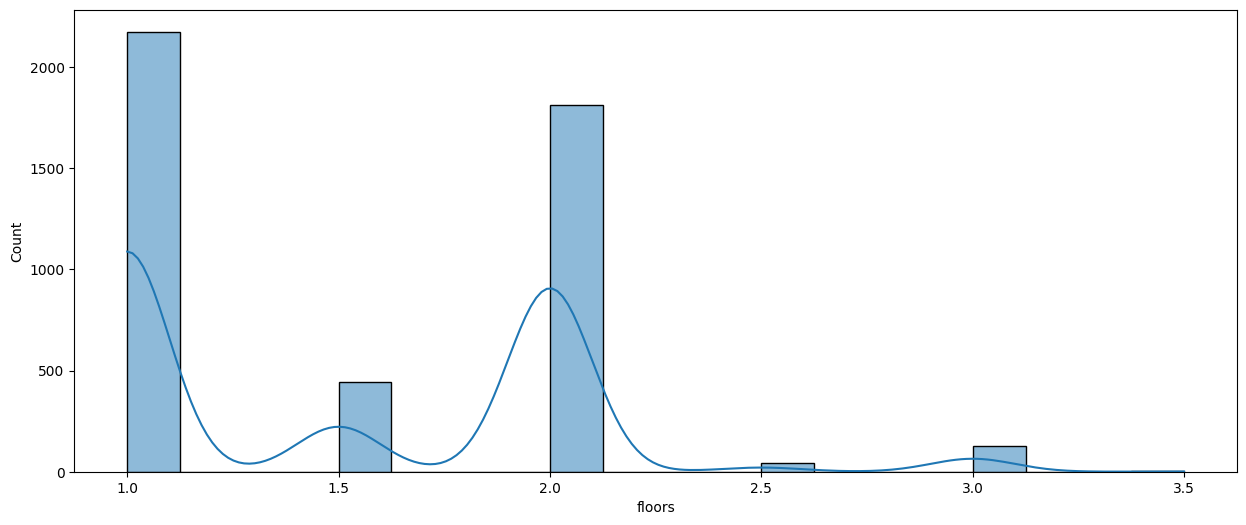

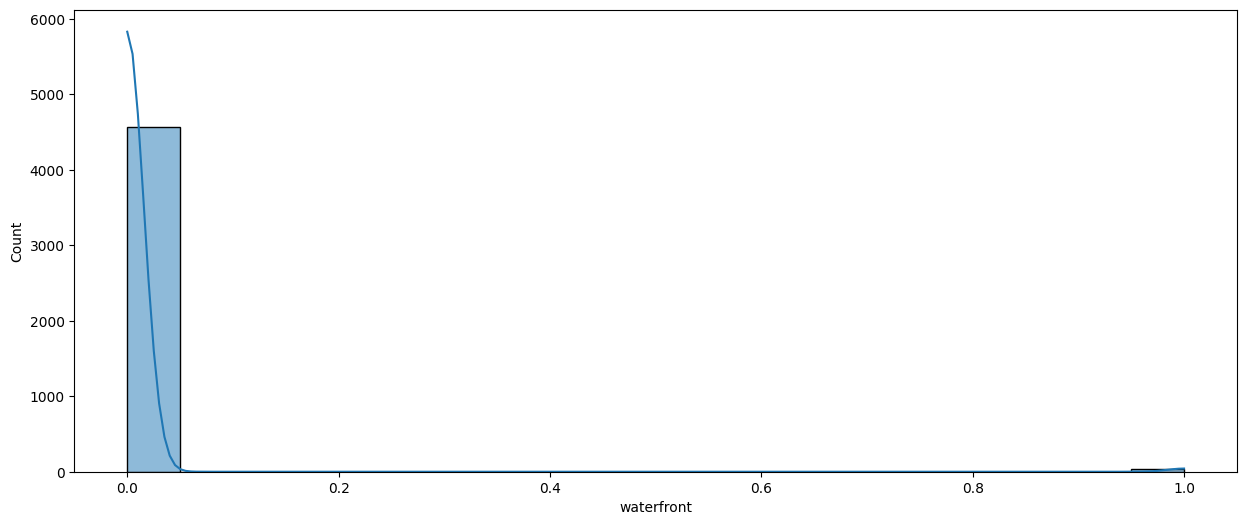

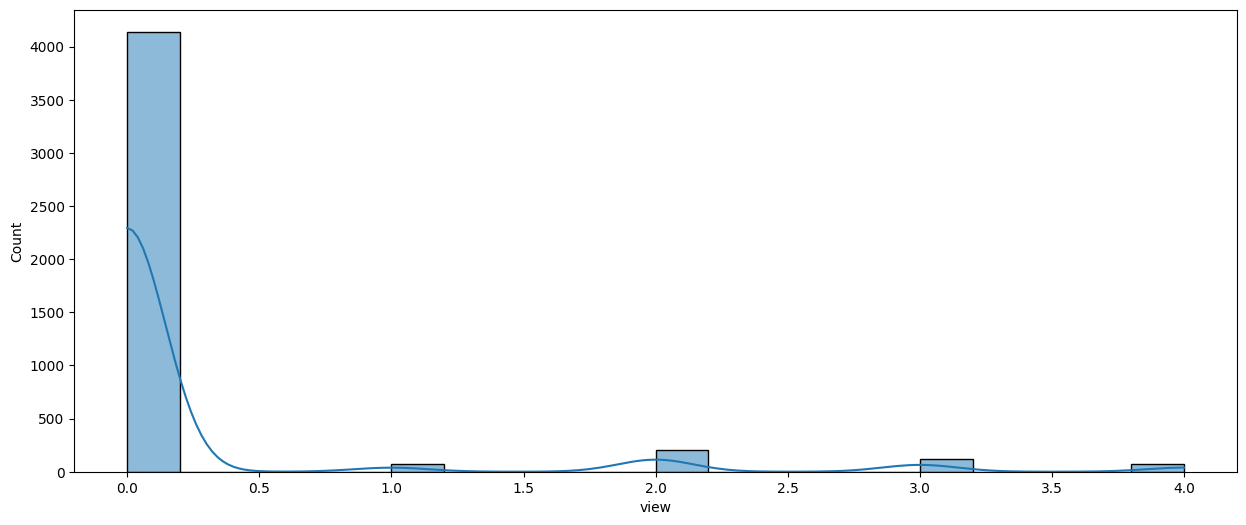

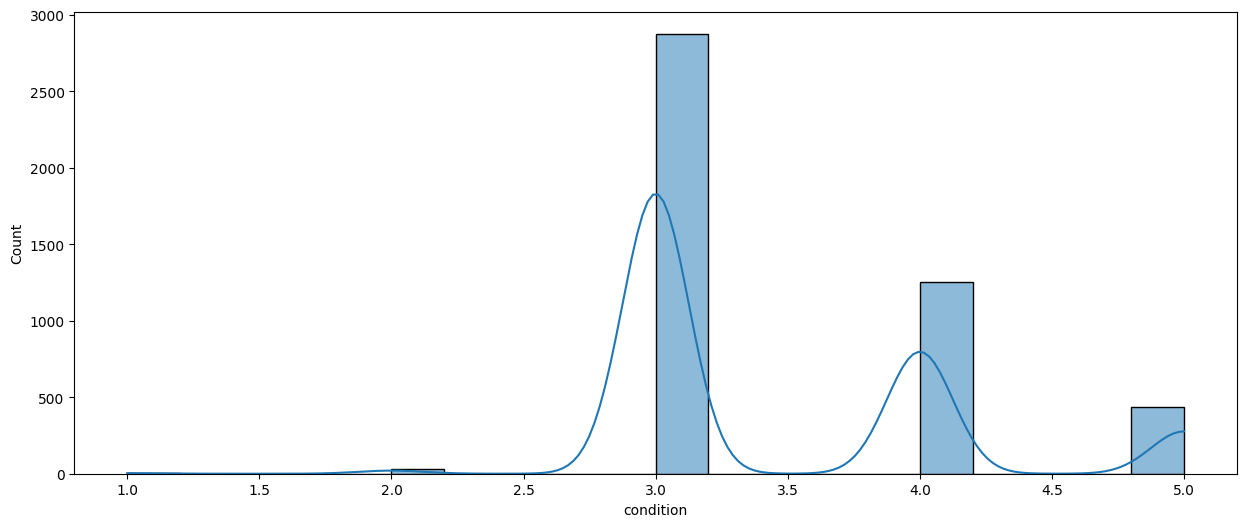

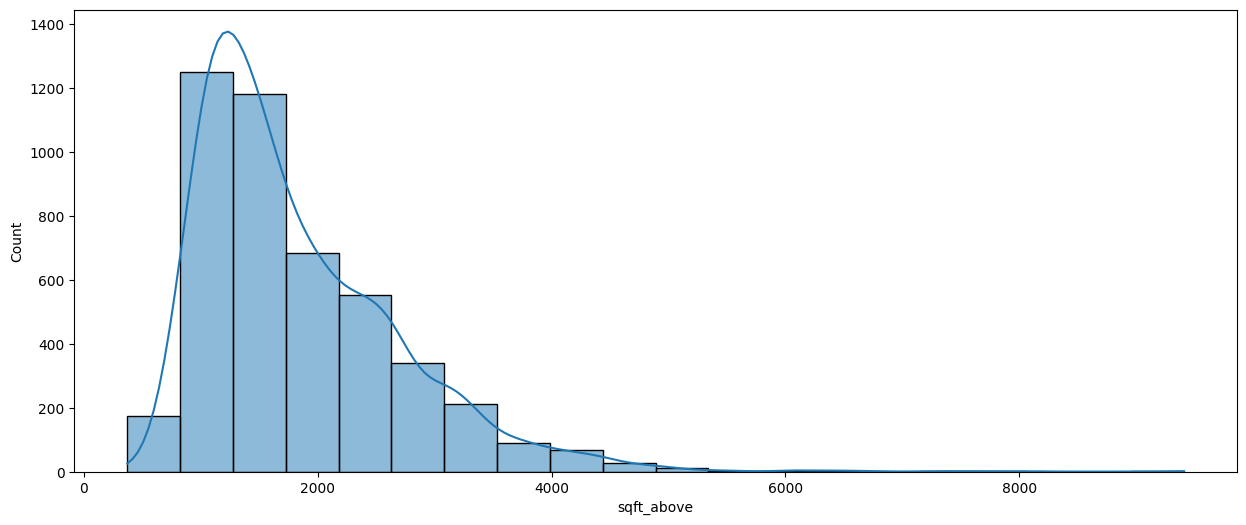

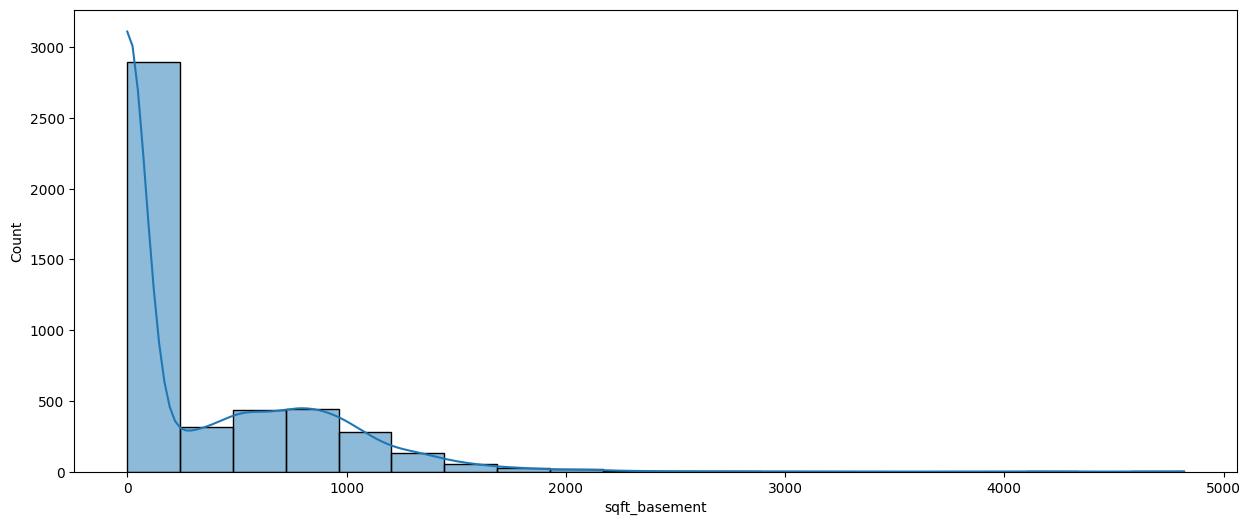

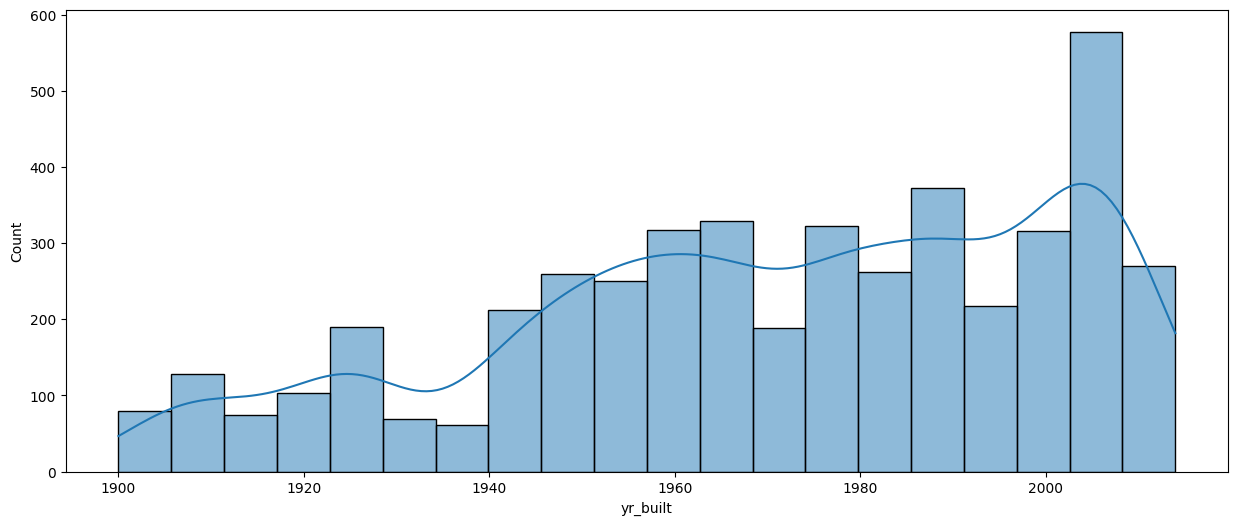

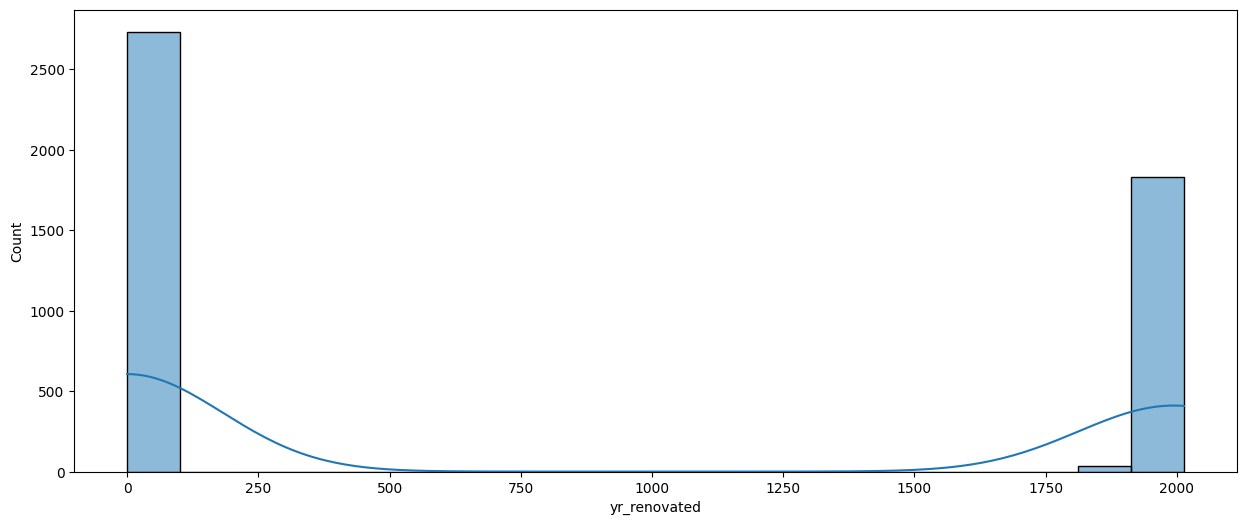

In [ ]:
for i in numerical_columns:
  plt.figure(figsize=(15,6))
  sns.histplot(df[i],kde = True, bins=20, )
  plt.xticks(rotation=0)
  plt.show()

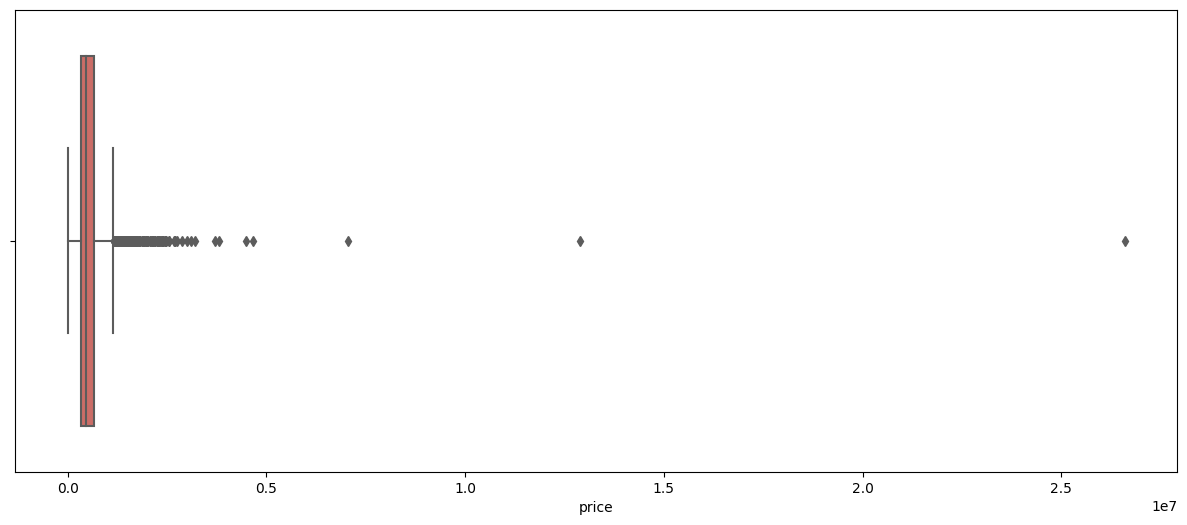

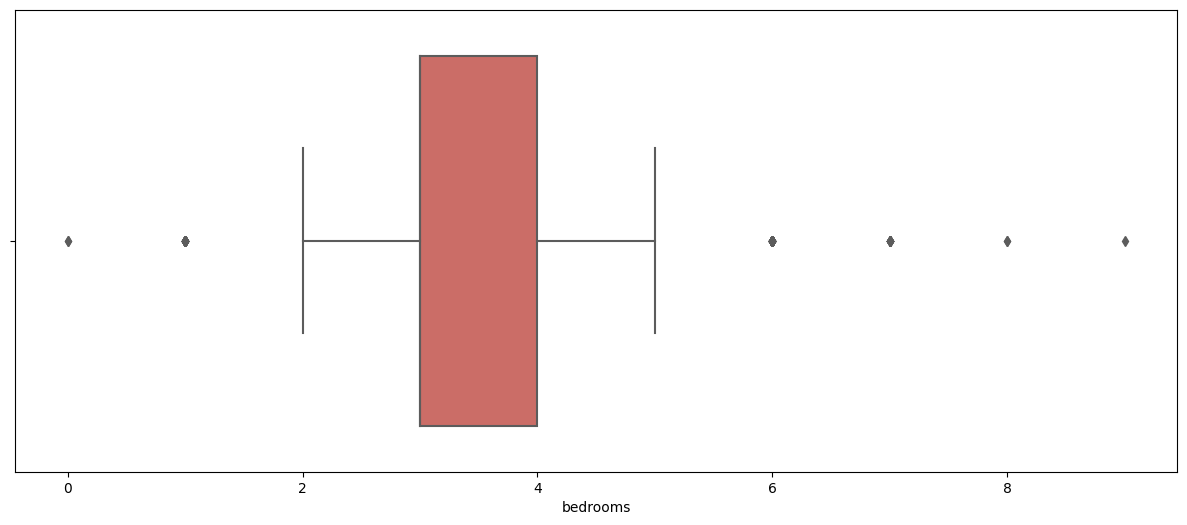

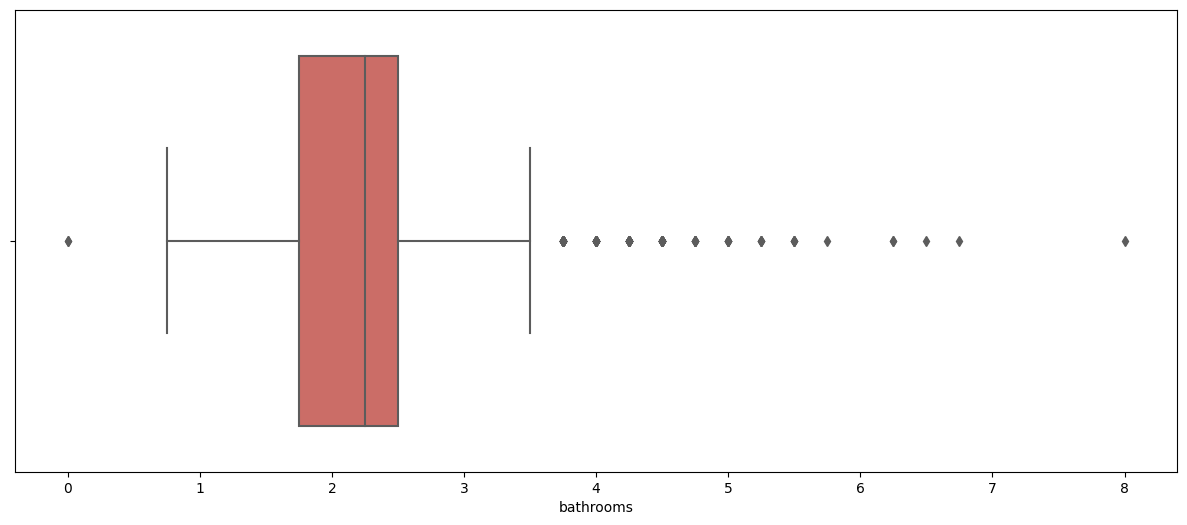

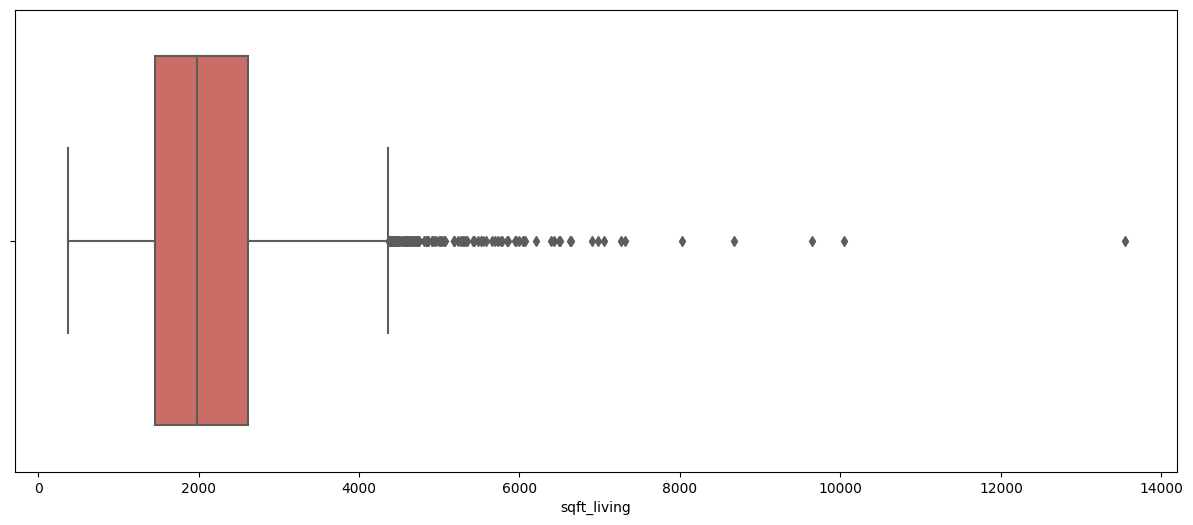

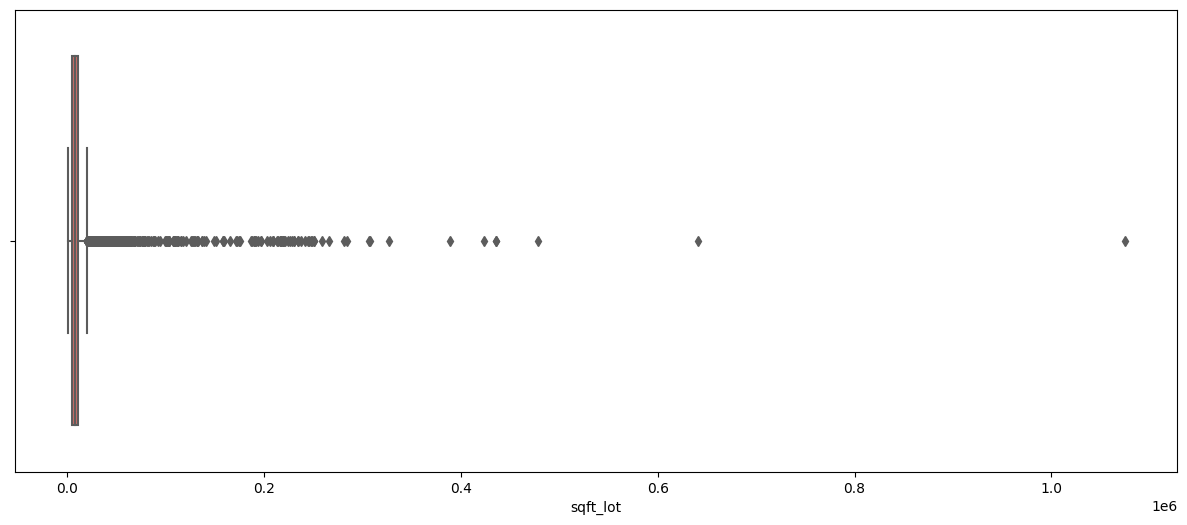

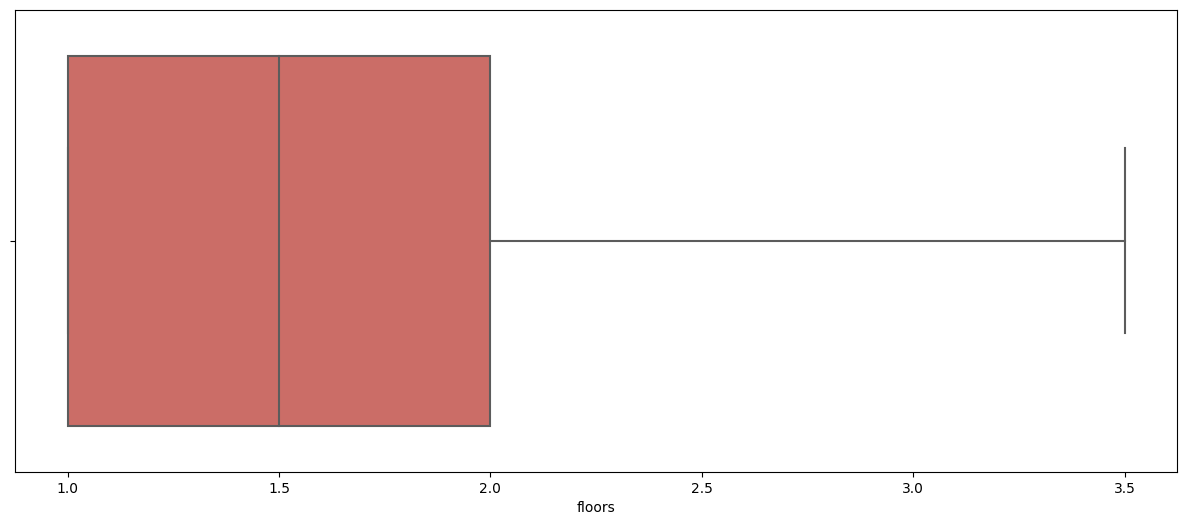

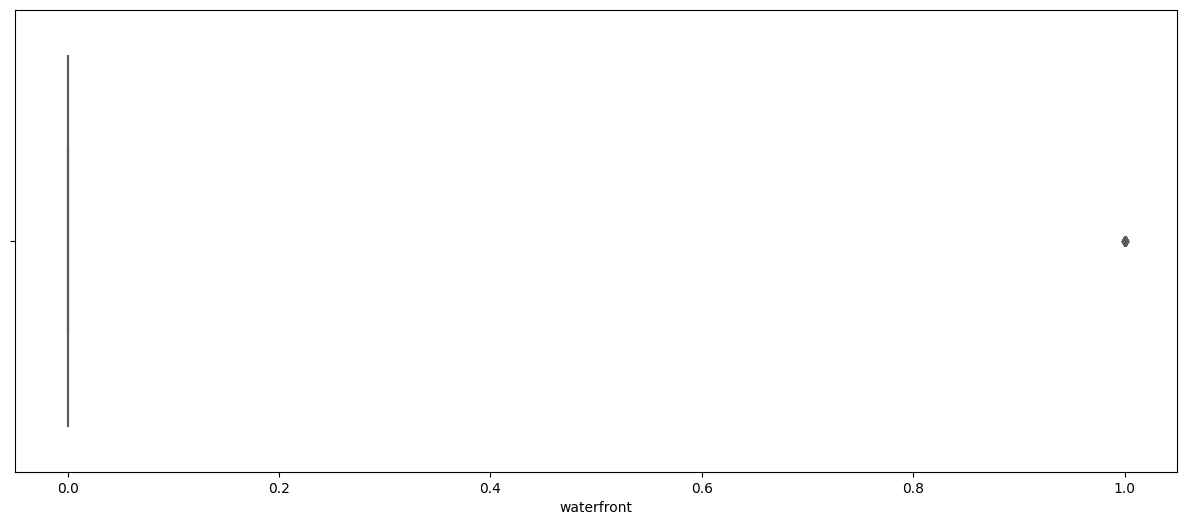

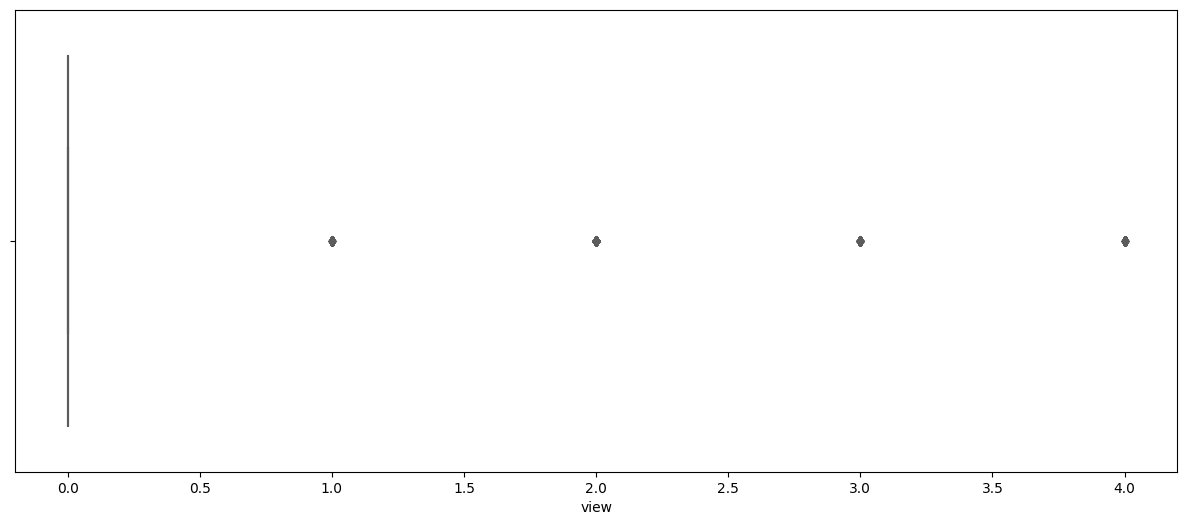

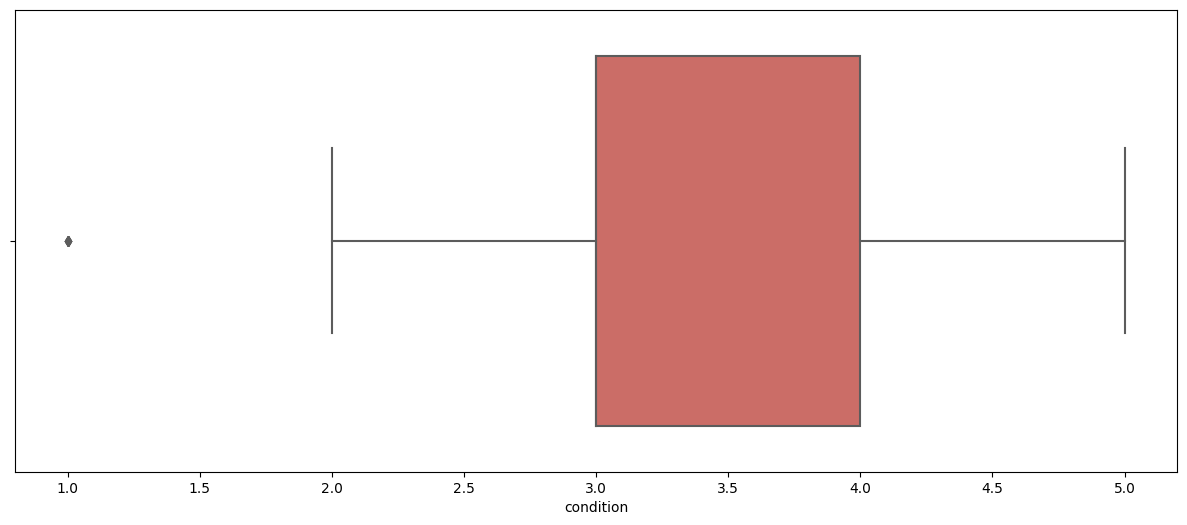

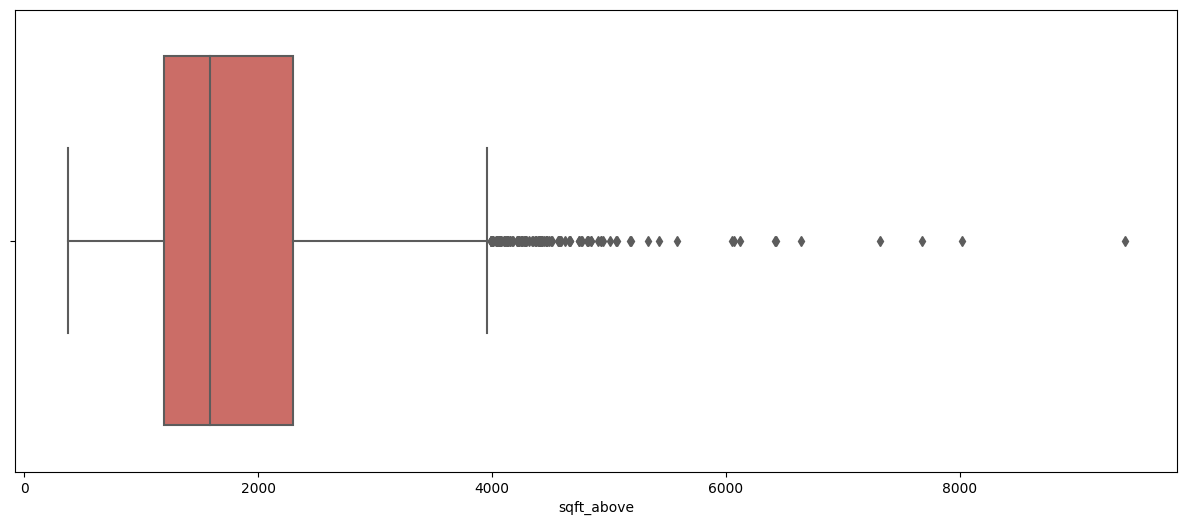

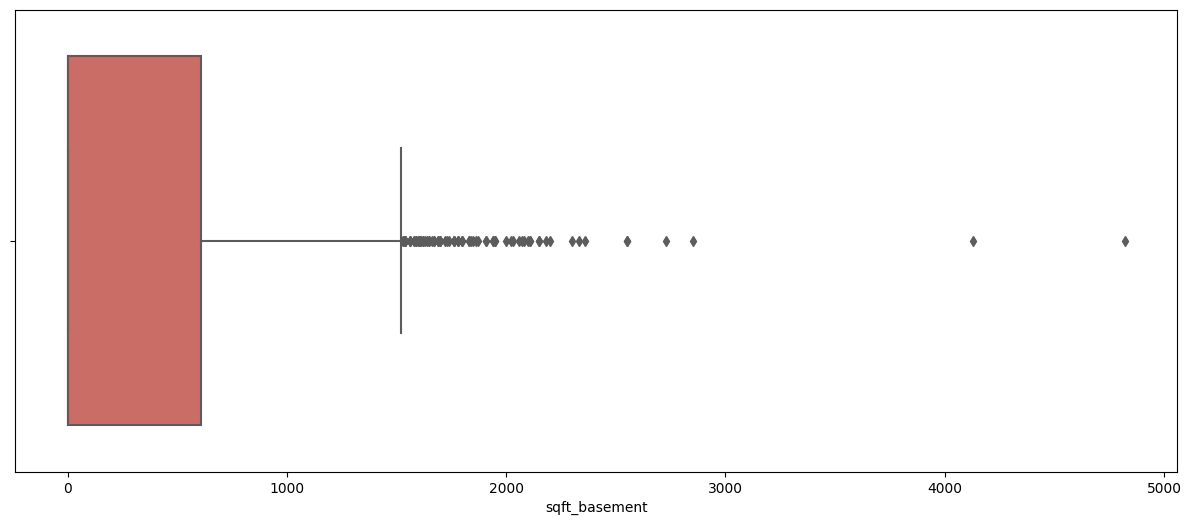

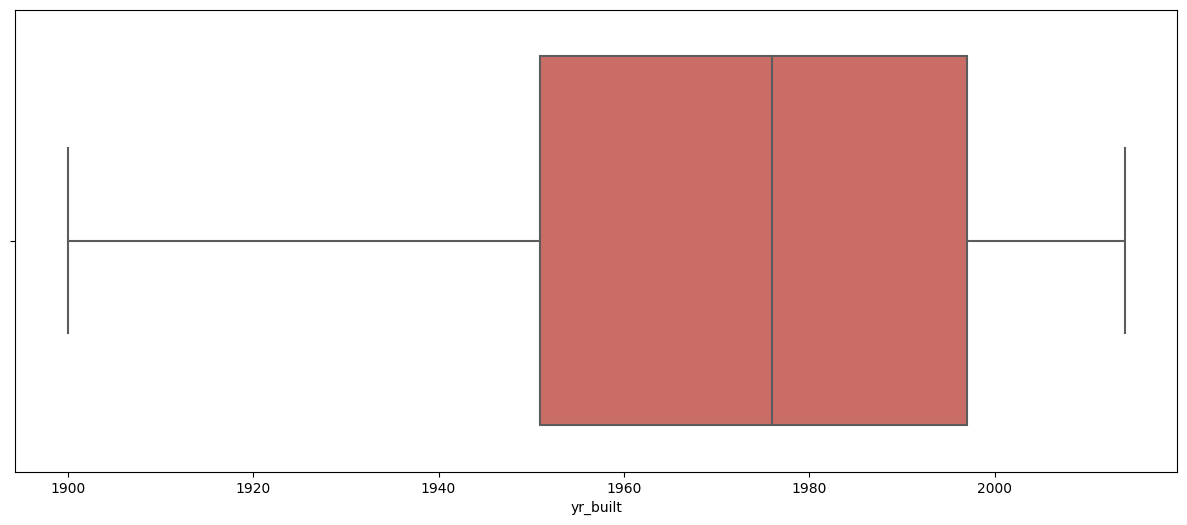

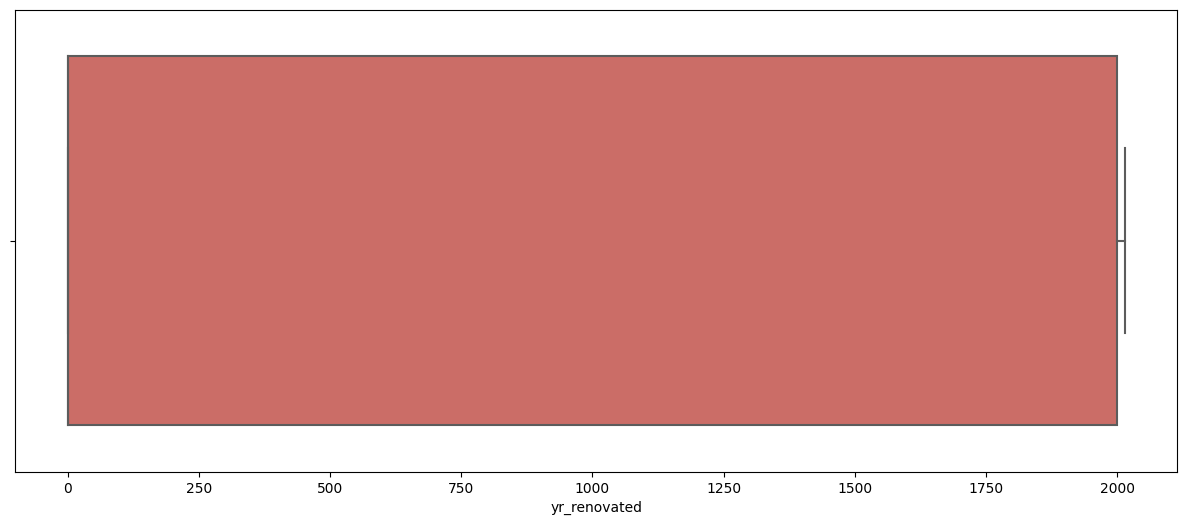

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df[i], data=df, palette='hls')
    plt.xticks(rotation=0)
    plt.show()


In [ ]:
                                                  Thank You (BY : Chandan Kumar)